### Predicting Likelihood of Churn in Massive Open Online Courses Using Multivariable Logistic Regression

#### Introduction

A Massive Open Online Course (MOOC) is an affordable, flexible and expedited way to develop technical or professional skills at scale. Even incredibly reputable and renowned institutions, like Harvard and MIT who provide MOOC content , are struggling with attrition rates upward too 96% over a five-year time span. With tens of thousands of students enrolling (estimate suggests 40-60,000 per course), name recognition only assists with recruitment and marketing. Across multiple platforms such as EDX(A partnership between Harvard and MIT), Coursera and Udemy, the proportion of students who actually complete these courses ranges from 1-5%. Analysts and academics have coined a term for the goal of successful MOOCs: The retention funnel, and note that if these proportions occured and were observed in an in-person environment, the school would be shut down.

Market analysts predict that the MOOC market value in the educational technology sector will grow by 40% within the next seven years according to market research from Data Bridge. However, despite this growth, many MOOCs exhibit rates of 905 or more.
#### Therefore this project aims to identify and leverage variables that are used to preempt such customer, or in this case, student attrition.

The overarching goal of this project is to leverage available demographic, behavioral and content-based features to predict whether or not a student will finish a MOOC. My hypothesis is: By identifying and combining the demograpic, behavioral and content-based numeric features in a multivariable logistic regression model, it will be possible to make a binary prediction of whether or not a student will earn a certificate of completion in a course on EDX.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.metrics import classification_report

### Section 1: Exploratory Data Analysis

This project relies upon a combination of data sets which include information on courses, student behaviour and content performance. The first section represents the cleaning and preprocessing efforts to create that comprehensive dataframe.

In [3]:
edx_courses = pd.read_csv('edx_courses.csv')
# The dataset is sourced from the wesite: https://www.kaggle.com/datasets/imuhammad/edx-courses

The first dataset contains mostly text-based information(such as title, summary and subject) related to EDX, an open-source educational platform that hosts content from Harvard and MIT.

In [4]:
edx_courses.head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [5]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

In [6]:
# Creating a more legible and consistent column labels.
edx_courses.columns = ['EDX_Title','Summary','N_enrolled','Course_Type','Institution','EDX_Instructors','Level','EDX_Subject','Language','Subtitles','Course_Effort','Course_Length','EDX_Price','Course_Description','Course_Syllabus','Course_URL']

In [7]:
edx_courses.head(3)

,EDX_Title,Summary,N_enrolled,Course_Type,Institution,EDX_Instructors,Level,EDX_Subject,Language,Subtitles,Course_Effort,Course_Length,EDX_Price,Course_Description,Course_Syllabus,Course_URL
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...


### The next dataset also includes information related to EDX. However, this file contains data relating to student metrics including percentage who earned a certificate, which will later be used as a target variable for the regression model.

In [8]:
mooc_2016 = pd.read_csv('edx_2016.csv')
# The dataset is taken from the following website: https://www.kaggle.com/datasets/edx/course-study

In [9]:
mooc_2016.head(3)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


In [10]:
mooc_2016.columns = ['Institution', 'Course_Number', 'Launch_Date', 'Title', 'Instructors', 'Subject', 'Year', 'Honor_Code_Certificates', 'Participants', 'N_Completed_50_Percent_Audit', 'Certificate', 'Percentage_Audited', 'Percentage_Certified', 'Course_Content_Accessed', 'Played_Video', 'Posted_In_Forum', 'Grade_Higher_Than_Zero', 'Total_Course_Hours', 'Hours_Certification', 'Age', 'Male', 'Female', 'Bachelors_Or_Higher']

In [11]:
mooc_2016.head(3)

,Institution,Course_Number,Launch_Date,Title,Instructors,Subject,Year,Honor_Code_Certificates,Participants,N_Completed_50_Percent_Audit,...,Course_Content_Accessed,Played_Video,Posted_In_Forum,Grade_Higher_Than_Zero,Total_Course_Hours,Hours_Certification,Age,Male,Female,Bachelors_Or_Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


In [12]:
mooc_2016.isna().sum()

Institution                     0
Course_Number                   0
Launch_Date                     0
Title                           0
Instructors                     1
Subject                         0
Year                            0
Honor_Code_Certificates         0
Participants                    0
N_Completed_50_Percent_Audit    0
Certificate                     0
Percentage_Audited              0
Percentage_Certified            0
Course_Content_Accessed         0
Played_Video                    0
Posted_In_Forum                 0
Grade_Higher_Than_Zero          0
Total_Course_Hours              0
Hours_Certification             0
Age                             0
Male                            0
Female                          0
Bachelors_Or_Higher             0
dtype: int64

In [13]:
mooc_2016['Launch_Date'] = pd.to_datetime(mooc_2016['Launch_Date'])

In [14]:
mooc_2016.dropna(how='any', inplace=True)

In [15]:
mooc_2016.isna().sum()

Institution                     0
Course_Number                   0
Launch_Date                     0
Title                           0
Instructors                     0
Subject                         0
Year                            0
Honor_Code_Certificates         0
Participants                    0
N_Completed_50_Percent_Audit    0
Certificate                     0
Percentage_Audited              0
Percentage_Certified            0
Course_Content_Accessed         0
Played_Video                    0
Posted_In_Forum                 0
Grade_Higher_Than_Zero          0
Total_Course_Hours              0
Hours_Certification             0
Age                             0
Male                            0
Female                          0
Bachelors_Or_Higher             0
dtype: int64

In [16]:
mooc_2016.head(3)

,Institution,Course_Number,Launch_Date,Title,Instructors,Subject,Year,Honor_Code_Certificates,Participants,N_Completed_50_Percent_Audit,...,Course_Content_Accessed,Played_Video,Posted_In_Forum,Grade_Higher_Than_Zero,Total_Course_Hours,Hours_Certification,Age,Male,Female,Bachelors_Or_Higher
0,MITx,6.002x,2012-09-05,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,2012-09-26,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,2012-10-09,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


## Bivariate scatter plots reveal statistically significant relationships among academic history and course performance.

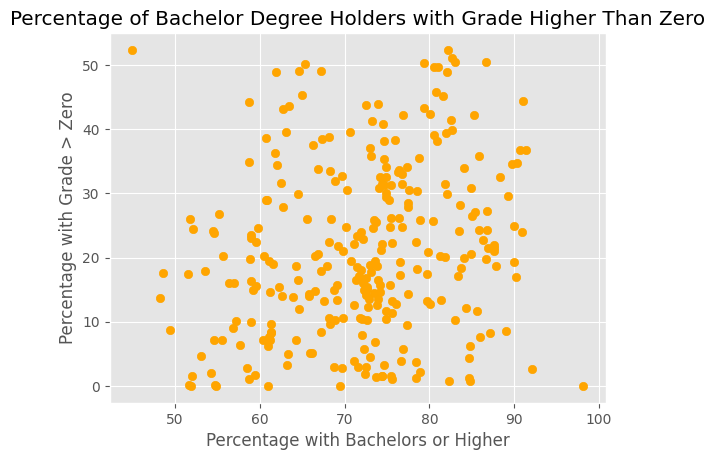

In [17]:
plt.scatter(x = 'Bachelors_Or_Higher', y = 'Grade_Higher_Than_Zero', data = mooc_2016, color = 'orange')
plt.title('Percentage of Bachelor Degree Holders with Grade Higher Than Zero')
plt.xlabel('Percentage with Bachelors or Higher')
plt.ylabel('Percentage with Grade > Zero')
plt.show()

### One of the major challenges of churn is to convert users on a free trial into paying customers. The graph below exhibits how unlikely it is for students auditing a course to later become certificate holders. 

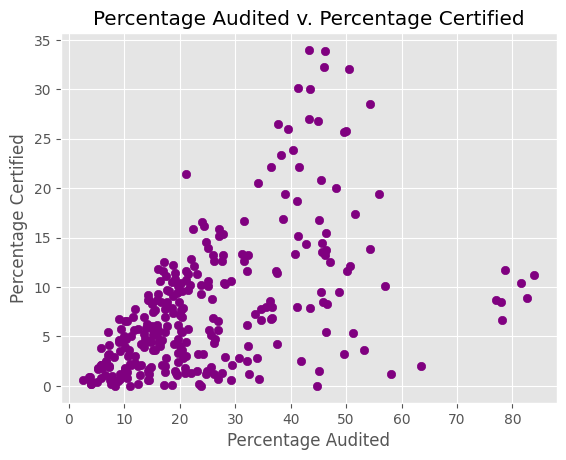

In [18]:
plt.scatter(x = 'Percentage_Audited', y = 'Percentage_Certified', data = mooc_2016, color = 'purple')
plt.title('Percentage Audited v. Percentage Certified')
plt.xlabel('Percentage Audited')
plt.ylabel('Percentage Certified')
plt.show()

Text(0, 0.5, 'Completed > 50 Percent of Course')

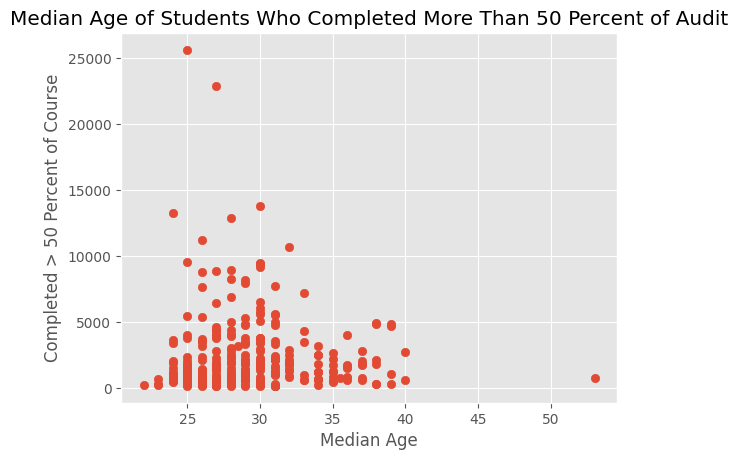

In [19]:
plt.scatter(x = 'Age', y = 'N_Completed_50_Percent_Audit', data = mooc_2016)
plt.title('Median Age of Students Who Completed More Than 50 Percent of Audit')
plt.xlabel('Median Age')
plt.ylabel('Completed > 50 Percent of Course')

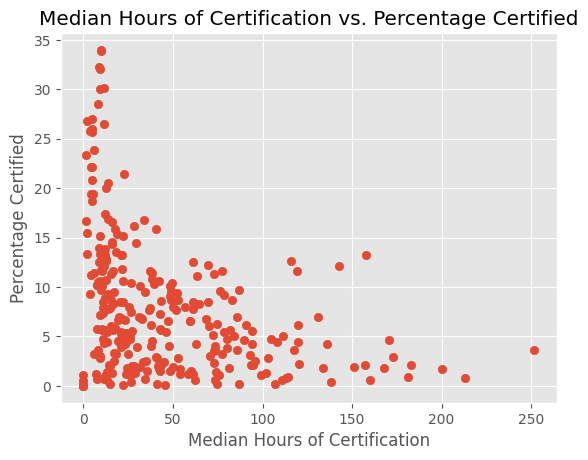

In [20]:
plt.scatter(x = 'Hours_Certification', y = 'Percentage_Certified', data = mooc_2016)
plt.title('Median Hours of Certification vs. Percentage Certified')
plt.xlabel('Median Hours of Certification')
plt.ylabel('Percentage Certified')
plt.show()

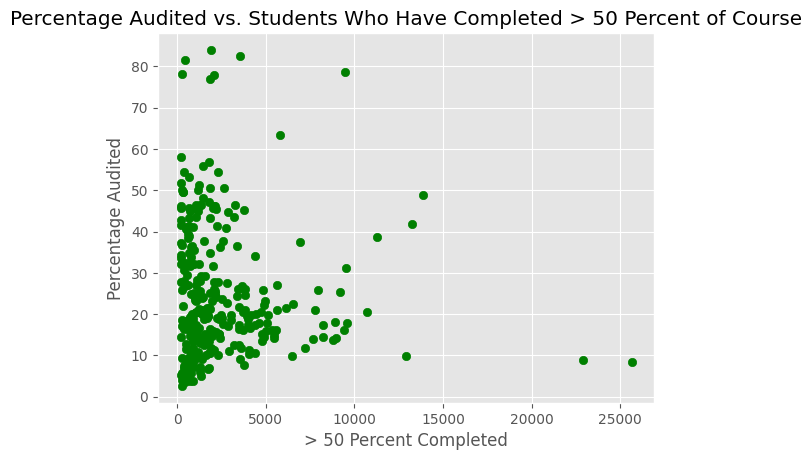

In [21]:
plt.scatter(x = 'N_Completed_50_Percent_Audit', y = 'Percentage_Audited', data = mooc_2016, color = 'green')
plt.title('Percentage Audited vs. Students Who Have Completed > 50 Percent of Course')
plt.xlabel('> 50 Percent Completed')
plt.ylabel('Percentage Audited')
plt.show()

C:\Users\anupa\AppData\Local\Temp\ipykernel_19220\2106595076.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=20)


<Axes: xlabel='Hours_Certification', ylabel='Density'>

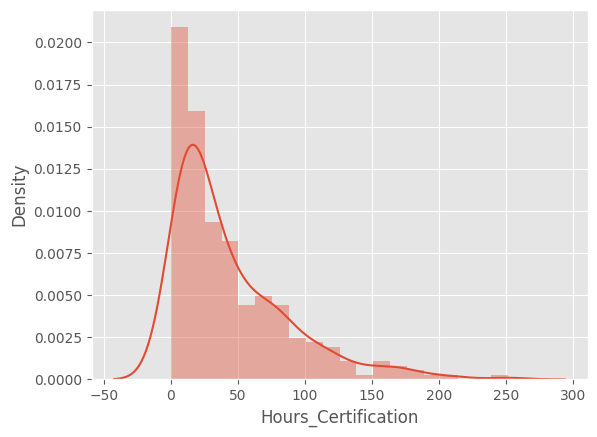

In [22]:
x = mooc_2016['Hours_Certification']
sns.distplot(x, bins=20)

C:\Users\anupa\AppData\Local\Temp\ipykernel_19220\1642966514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue', bins=20)


<Axes: xlabel='Age', ylabel='Density'>

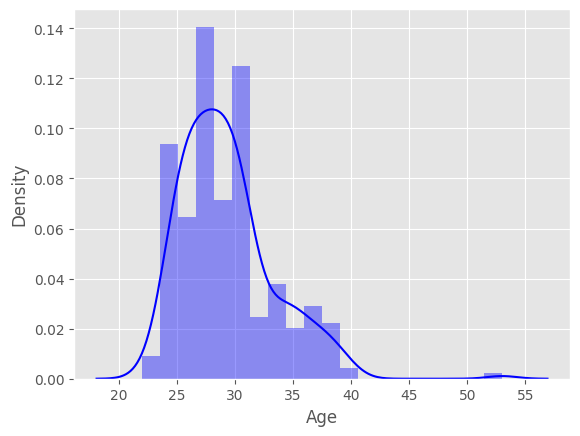

In [23]:
x = mooc_2016['Age']
sns.distplot(x, color = 'blue', bins=20)

C:\Users\anupa\AppData\Local\Temp\ipykernel_19220\3006195652.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=15, color='gold')


<Axes: xlabel='Bachelors_Or_Higher', ylabel='Density'>

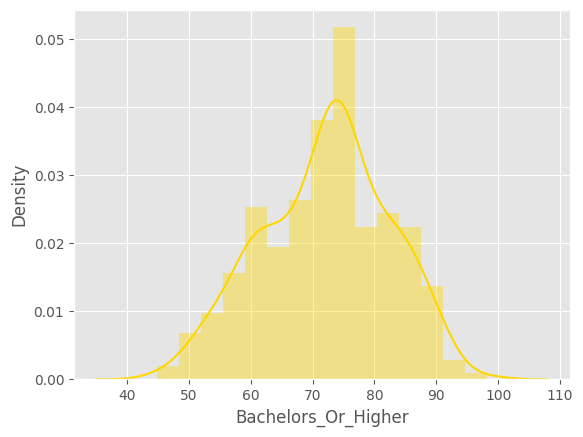

In [24]:
x = mooc_2016['Bachelors_Or_Higher']
sns.distplot(x, bins=15, color='gold')

### Conducting a correlation test allows us to obtain a preliminary idea of which variables are most impactful on the desired outcomes of earning a certificate or completing a course. A heat map helps visualize these relationships. 

In [25]:
numeric_columns = mooc_2016.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Year,Honor_Code_Certificates,Participants,N_Completed_50_Percent_Audit,Certificate,Percentage_Audited,Percentage_Certified,Course_Content_Accessed,Posted_In_Forum,Grade_Higher_Than_Zero,Total_Course_Hours,Hours_Certification,Age,Male,Female,Bachelors_Or_Higher
Year,1.000000,-0.371216,-0.275028,-0.310598,-0.505300,0.245831,-0.092178,-0.432969,-0.208171,-0.322277,-0.327359,0.020573,-0.085625,-0.046774,0.046774,0.066525
Honor_Code_Certificates,-0.371216,1.000000,0.132148,0.172172,0.292400,0.045013,0.392686,0.535052,0.044785,0.280544,0.105779,-0.025564,-0.007979,-0.011557,0.011557,-0.019144
Participants,-0.275028,0.132148,1.000000,0.854020,0.423183,-0.278157,-0.167368,-0.003601,-0.062613,-0.036733,0.560770,-0.009575,-0.124782,0.155968,-0.155968,-0.240486
N_Completed_50_Percent_Audit,-0.310598,0.172172,0.854020,1.000000,0.666075,-0.063784,-0.028510,0.047621,0.054229,0.125208,0.595666,-0.102736,-0.046543,0.096613,-0.096613,-0.094487
Certificate,-0.505300,0.292400,0.423183,0.666075,1.000000,-0.115775,0.270604,0.523550,0.292439,0.499648,0.674220,-0.014134,0.040495,0.034374,-0.034374,0.013544
Percentage_Audited,0.245831,0.045013,-0.278157,-0.063784,-0.115775,1.000000,0.513470,-0.091161,0.098434,0.136823,-0.292689,-0.473195,0.336011,-0.266079,0.266079,0.434868
Percentage_Certified,-0.092178,0.392686,-0.167368,-0.028510,0.270604,0.513470,1.000000,0.671251,0.437141,0.619243,-0.063390,-0.357322,0.435807,-0.376506,0.376506,0.346340
Course_Content_Accessed,-0.432969,0.535052,-0.003601,0.047621,0.523550,-0.091161,0.671251,1.000000,0.386449,0.661915,0.257929,-0.010396,0.166634,-0.230090,0.230090,0.090615
Posted_In_Forum,-0.208171,0.044785,-0.062613,0.054229,0.292439,0.098434,0.437141,0.386449,1.000000,0.485193,0.065564,-0.184622,0.391966,-0.422240,0.422240,0.209505
Grade_Higher_Than_Zero,-0.322277,0.280544,-0.036733,0.125208,0.499648,0.136823,0.619243,0.661915,0.485193,1.000000,0.272611,-0.051306,0.178276,-0.182352,0.182352,0.199938


<Axes: title={'center': 'Correlation of Variables in MOOC Dataset'}>

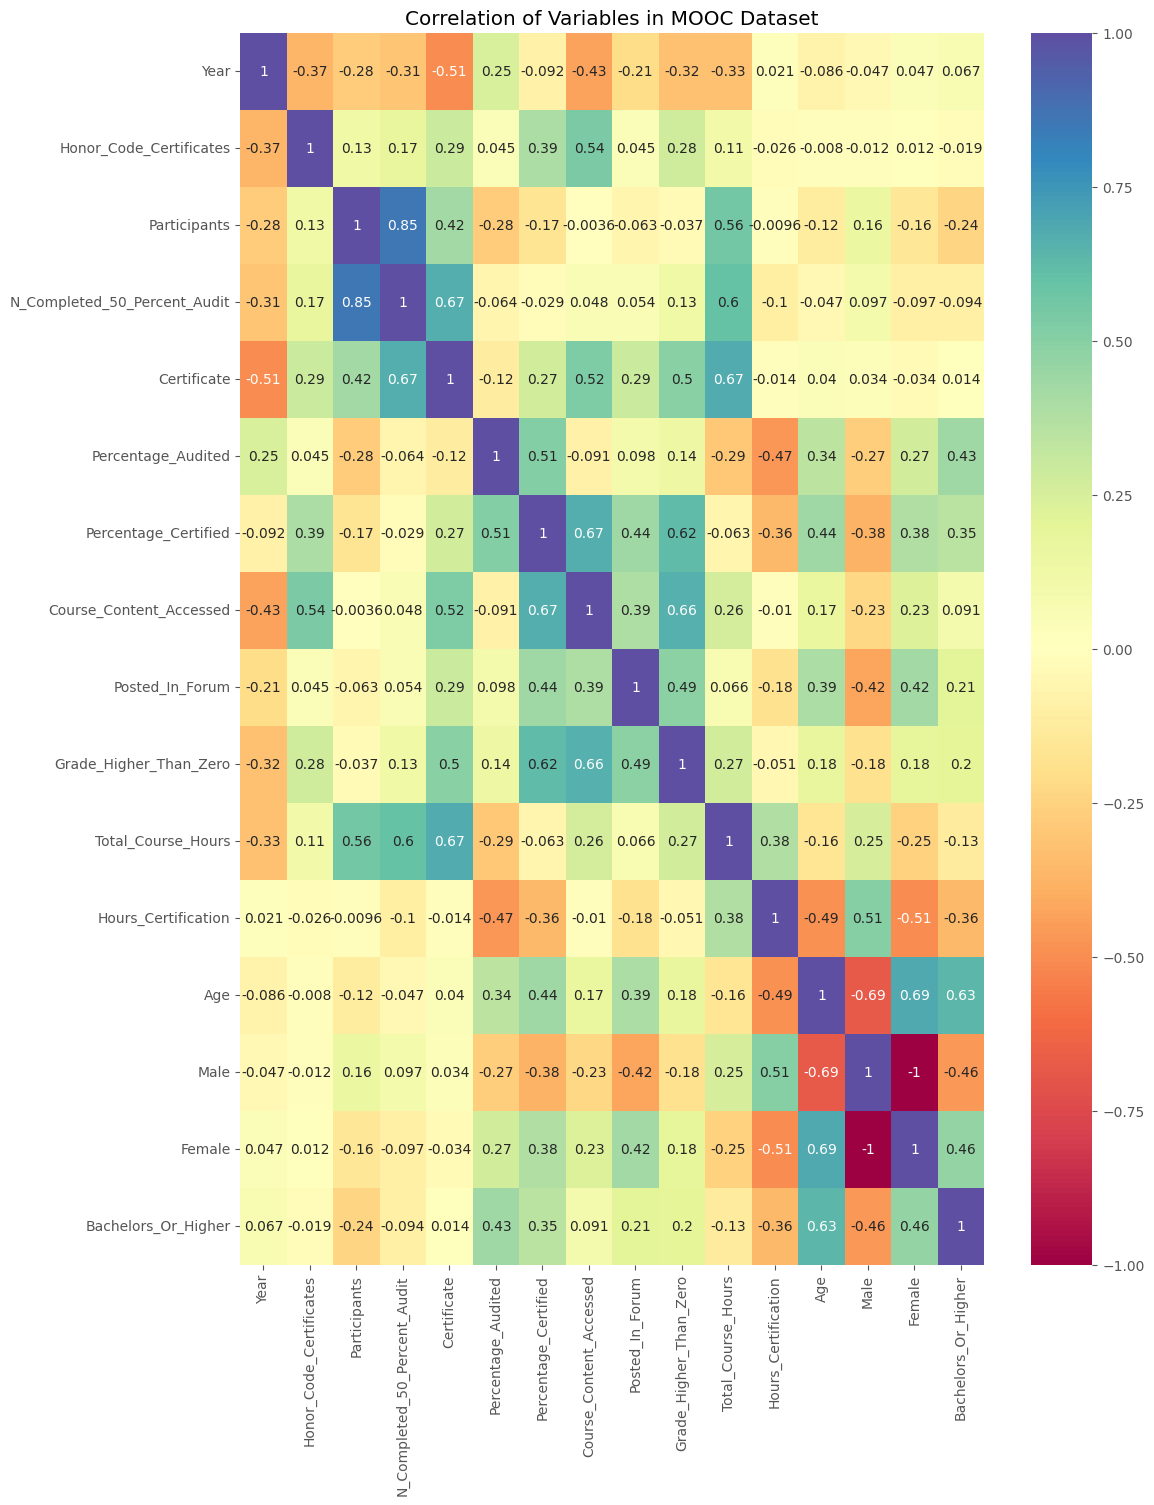

In [26]:
plt.figure(figsize=(12,16))
plt.title('Correlation of Variables in MOOC Dataset')
sns.heatmap(correlation_matrix, cmap = 'Spectral', annot=True)

### The third dataset includes information that describes the attributes of content on the EDX platform. 

In [28]:
# https://github.com/kanika-narang/MOOC_Data_Analysis/blob/master/DATA/cleaned%20data/big_student_clear_third_version.csv
mooc_2017 = pd.read_csv('big_student_clear_third_version.csv')

In [29]:
mooc_2017.head(3)

,Unnamed: 0,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,4,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,6,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,7,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24


In [30]:
del mooc_2017['Unnamed: 0']

In [31]:
mooc_2017.head(3)

,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,Bachelor's,...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,Secondary,...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,Bachelor's,...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24


In [32]:
mooc_2017.columns=['Institute', 'Course_ID', 'Course_Year', 'Semester', 'ID', 'Viewed', 'Explored', 'Certified', 'Country', 'Ed_Level', 'Gender', 'Grade', 'Start_Date', 'Last_Activity_Date', 'N_Events', 'N_Active_Days', 'N_Played_Video', 'N_Chapters', 'N_Forum_Posts', 'Flagged_Incomplete', 'Age']

In [33]:
mooc_2017.head(3)

,Institute,Course_ID,Course_Year,Semester,ID,Viewed,Explored,Certified,Country,Ed_Level,...,Grade,Start_Date,Last_Activity_Date,N_Events,N_Active_Days,N_Played_Video,N_Chapters,N_Forum_Posts,Flagged_Incomplete,Age
0,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,Bachelor's,...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,Secondary,...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,Bachelor's,...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24


In [34]:
mooc_2017['Start_Date'] = pd.to_datetime(mooc_2017['Start_Date'])

In [35]:
mooc_2017.head(3)

,Institute,Course_ID,Course_Year,Semester,ID,Viewed,Explored,Certified,Country,Ed_Level,...,Grade,Start_Date,Last_Activity_Date,N_Events,N_Active_Days,N_Played_Video,N_Chapters,N_Forum_Posts,Flagged_Incomplete,Age
0,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,Bachelor's,...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,Secondary,...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,Bachelor's,...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24


In [36]:
mooc_2017['Last_Activity_Date'] = pd.to_datetime(mooc_2017['Last_Activity_Date'])

In [37]:
mooc_2017.head(3)

,Institute,Course_ID,Course_Year,Semester,ID,Viewed,Explored,Certified,Country,Ed_Level,...,Grade,Start_Date,Last_Activity_Date,N_Events,N_Active_Days,N_Played_Video,N_Chapters,N_Forum_Posts,Flagged_Incomplete,Age
0,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,Bachelor's,...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,Secondary,...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,Bachelor's,...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24


In [38]:
mooc_2017.isna().sum()

Institute                 0
Course_ID                 0
Course_Year               0
Semester                  0
ID                        0
Viewed                    0
Explored                  0
Certified                 0
Country                   0
Ed_Level                  0
Gender                23211
Grade                     0
Start_Date                0
Last_Activity_Date        0
N_Events                  0
N_Active_Days             0
N_Played_Video            0
N_Chapters                0
N_Forum_Posts             0
Flagged_Incomplete        0
Age                       0
dtype: int64

In [39]:
mooc_2017.dropna(how='any', inplace=True)

In [40]:
mooc_2017.isna().sum()

Institute             0
Course_ID             0
Course_Year           0
Semester              0
ID                    0
Viewed                0
Explored              0
Certified             0
Country               0
Ed_Level              0
Gender                0
Grade                 0
Start_Date            0
Last_Activity_Date    0
N_Events              0
N_Active_Days         0
N_Played_Video        0
N_Chapters            0
N_Forum_Posts         0
Flagged_Incomplete    0
Age                   0
dtype: int64

In [41]:
mooc_2017.describe()

,Course_Year,Viewed,Explored,Certified,Grade,Start_Date,Last_Activity_Date,N_Events,N_Active_Days,N_Played_Video,N_Chapters,N_Forum_Posts,Flagged_Incomplete,Age
count,393710.000000,393710.000000,393710.000000,393710.000000,393710.000000,393710,393710,393710.000000,393710.000000,393710.000000,393710.000000,393710.000000,393710.000000,393710.000000
mean,2012.561533,0.707092,0.077108,0.035732,0.040314,2013-01-21 20:04:27.144852992,2013-03-10 18:27:24.893957120,374.690940,5.216936,121322.217307,2.628325,0.017368,0.029189,27.025874
min,2012.000000,0.000000,0.000000,0.000000,0.000000,2012-07-24 00:00:00,2012-07-24 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000,2012-10-16 00:00:00,2012-12-22 00:00:00,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,21.000000
50%,2013.000000,1.000000,0.000000,0.000000,0.000000,2013-02-02 00:00:00,2013-03-17 00:00:00,19.000000,2.000000,197757.000000,1.000000,0.000000,0.000000,25.000000
75%,2013.000000,1.000000,0.000000,0.000000,0.000000,2013-03-30 00:00:00,2013-05-29 00:00:00,134.000000,4.000000,197757.000000,3.000000,0.000000,0.000000,30.000000
max,2013.000000,1.000000,1.000000,1.000000,1.000000,2013-09-07 00:00:00,2013-11-17 00:00:00,53180.000000,205.000000,197757.000000,47.000000,6.000000,1.000000,82.000000
std,0.496200,0.455097,0.266762,0.185621,0.163789,NaN,NaN,1342.005924,10.780699,96254.867085,4.261712,0.177836,0.168336,8.786009


In [42]:
mooc_2017.tail()

,Institute,Course_ID,Course_Year,Semester,ID,Viewed,Explored,Certified,Country,Ed_Level,...,Grade,Start_Date,Last_Activity_Date,N_Events,N_Active_Days,N_Played_Video,N_Chapters,N_Forum_Posts,Flagged_Incomplete,Age
416916,MITx,6.002x,2013,Spring,MHxPC130030805,1,0,0,Pakistan,Master's,...,0.0,2013-09-07,2013-09-07,29,1,197757,1,0,0,24
416917,MITx,6.00x,2013,Spring,MHxPC130184108,1,0,0,Canada,Bachelor's,...,0.0,2013-09-07,2013-09-07,97,1,4,2,0,0,22
416918,MITx,6.00x,2013,Spring,MHxPC130359782,0,0,0,Other Europe,Bachelor's,...,0.0,2013-09-07,2013-09-07,1,1,197757,0,0,0,22
416919,MITx,6.002x,2013,Spring,MHxPC130098513,0,0,0,United States,Doctorate,...,0.0,2013-09-07,2013-09-07,1,1,197757,0,0,0,34
416920,MITx,6.00x,2013,Spring,MHxPC130098513,1,0,0,United States,Doctorate,...,0.0,2013-09-07,2013-09-07,74,1,14,1,0,0,34


In [44]:
numeric_columns_2017 = mooc_2017.select_dtypes(include='number')
correlation_matrix_2017 = numeric_columns_2017.corr()
correlation_matrix_2017

,Course_Year,Viewed,Explored,Certified,Grade,N_Events,N_Active_Days,N_Played_Video,N_Chapters,N_Forum_Posts,Flagged_Incomplete,Age
Course_Year,1.000000,0.041251,-0.077772,-0.000349,-0.011917,-0.028654,-0.028247,0.023826,0.011106,0.026776,0.140330,0.072992
Viewed,0.041251,1.000000,0.185975,0.123896,0.158412,0.178348,0.238291,-0.510069,0.392940,0.061729,-0.112390,-0.003540
Explored,-0.077772,0.185975,1.000000,0.634580,0.699186,0.595685,0.676136,-0.132040,0.789199,0.090469,-0.050064,0.011908
Certified,-0.000349,0.123896,0.634580,1.000000,0.933381,0.636337,0.684964,-0.135536,0.625370,0.090307,-0.033379,0.000227
Grade,-0.011917,0.158412,0.699186,0.933381,1.000000,0.700222,0.746537,-0.180402,0.692101,0.103204,-0.042487,-0.001198
N_Events,-0.028654,0.178348,0.595685,0.636337,0.700222,1.000000,0.843506,-0.290431,0.608066,0.121598,-0.048413,0.011576
N_Active_Days,-0.028247,0.238291,0.676136,0.684964,0.746537,0.843506,1.000000,-0.286146,0.713727,0.137566,-0.058935,0.026786
N_Played_Video,0.023826,-0.510069,-0.132040,-0.135536,-0.180402,-0.290431,-0.286146,1.000000,-0.244125,-0.051318,0.084625,0.021149
N_Chapters,0.011106,0.392940,0.789199,0.625370,0.692101,0.608066,0.713727,-0.244125,1.000000,0.135796,-0.090944,0.025241
N_Forum_Posts,0.026776,0.061729,0.090469,0.090307,0.103204,0.121598,0.137566,-0.051318,0.135796,1.000000,-0.014050,-0.029207


Text(0.5, 1.0, 'Correlation of Variables in Large MOOC Dataset')

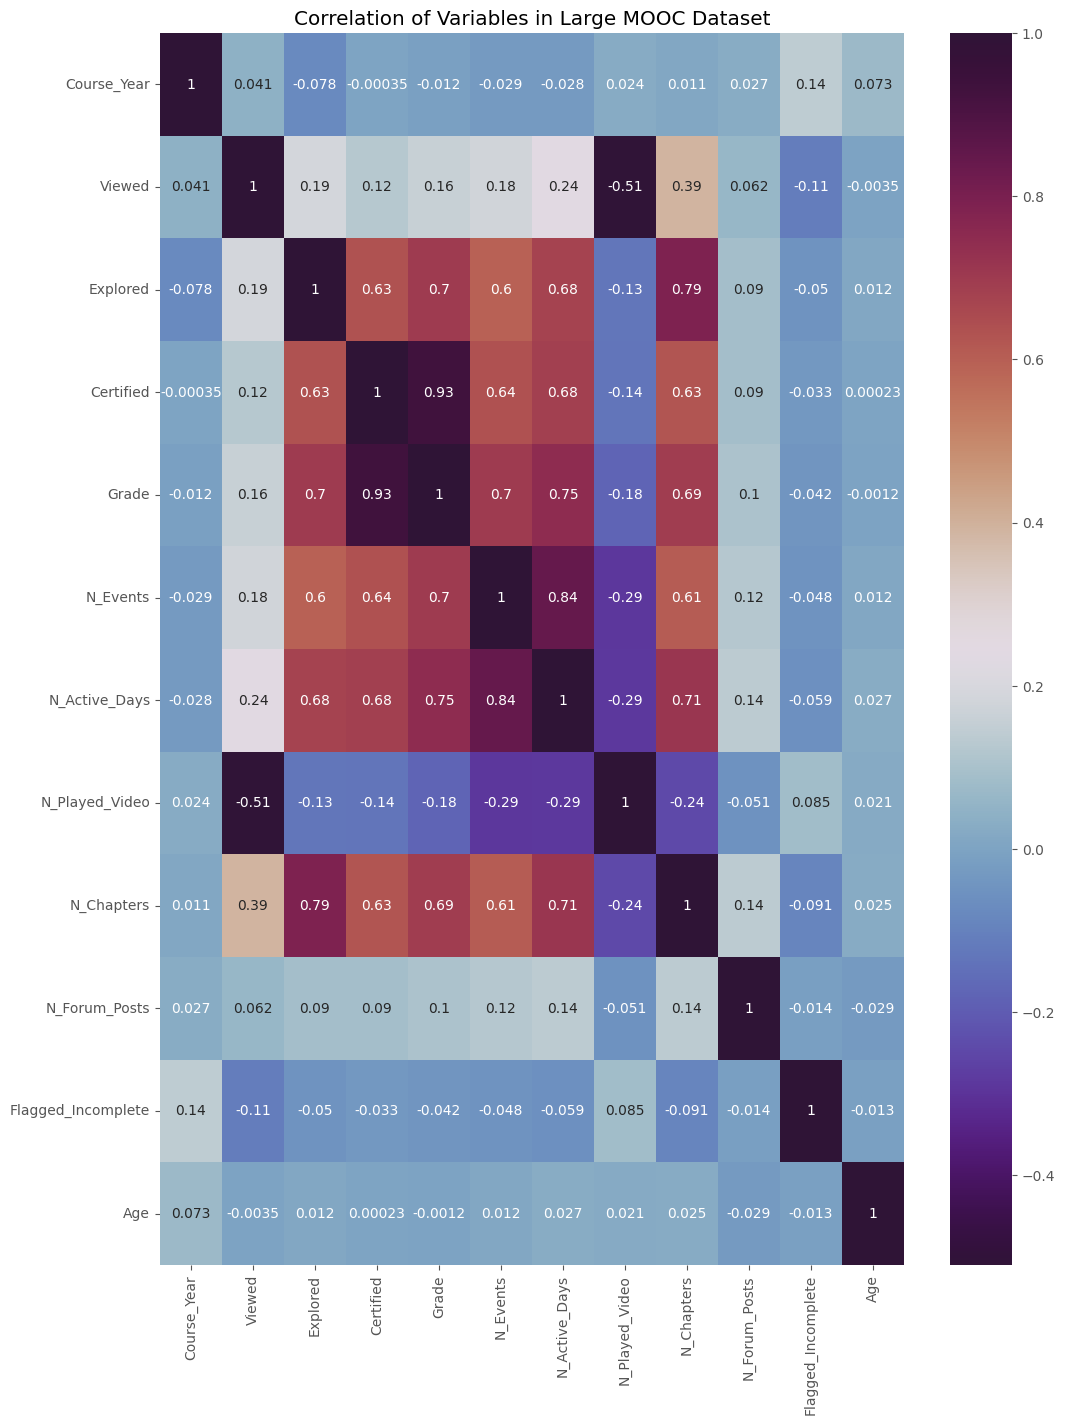

In [45]:
plt.figure(figsize=(12,16))
sns.heatmap(correlation_matrix_2017, cmap= 'twilight_shifted', annot=True)
plt.title('Correlation of Variables in Large MOOC Dataset')

C:\Users\anupa\AppData\Local\Temp\ipykernel_19220\1018679055.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'orange')


<Axes: xlabel='Age', ylabel='Density'>

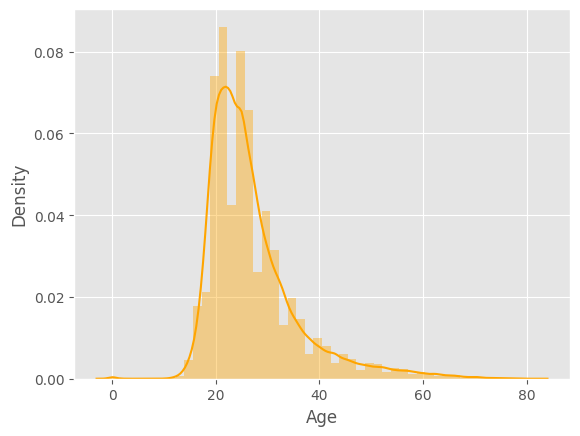

In [46]:
x = mooc_2017['Age']
sns.distplot(x, color = 'orange')

C:\Users\anupa\AppData\Local\Temp\ipykernel_19220\1488202579.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'purple', bins=20)


<Axes: xlabel='N_Chapters', ylabel='Density'>

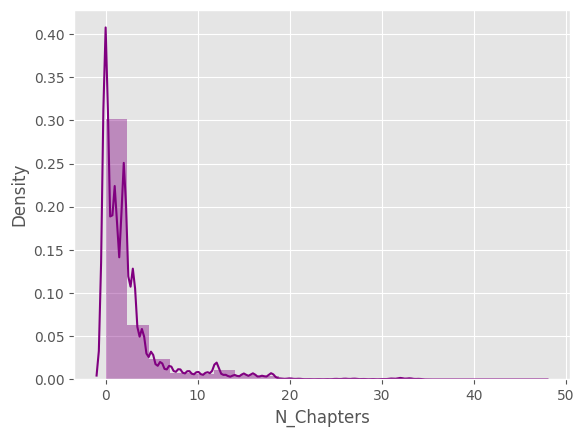

In [47]:
x = mooc_2017['N_Chapters']
sns.distplot(x, color = 'purple', bins=20)

C:\Users\anupa\AppData\Local\Temp\ipykernel_19220\2589232892.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color='orange', bins=50)


<Axes: xlabel='N_Active_Days', ylabel='Density'>

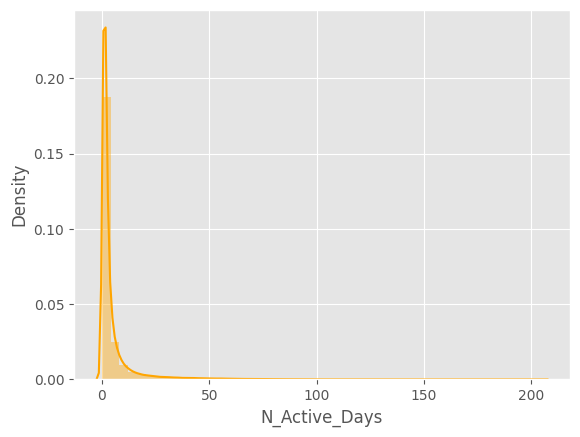

In [48]:
x = mooc_2017['N_Active_Days']
sns.distplot(x, color='orange', bins=50)

### The final dataset provides insight into the correlation between the number of subscribers, reviews, published lectures and whether or not a student will pay for such content. 

In [51]:
# https://www.kaggle.com/datasets/alperkulunkoglu/udemy-courses-2011-2017?select=WebDevelopment.csv
web_dev = pd.read_csv('WebDevelopment.csv')

In [52]:
web_dev.head(3)

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,Unnamed: 11,Unnamed: 12,Is Paid,Total,Percent
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z,NaN,NaN,Yes,1067.0,89%
1,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z,NaN,NaN,No,133.0,11%
2,889438,ChatBots: Messenger ChatBot with API.AI and No...,https://www.udemy.com/chatbots/,True,50,2577,529,64,All Levels,4.5 hours,2016-06-30T16:57:08Z,NaN,NaN,NaN,NaN,NaN


In [53]:
web_dev.isna().sum()

id                         0
title                      0
url                        0
isPaid                     0
price                      0
numSubscribers             0
numReviews                 0
numPublishedLectures       0
instructionalLevel         0
contentInfo                0
publishedTime              0
Unnamed: 11             1200
Unnamed: 12             1200
Is Paid                 1198
Total                   1198
Percent                 1198
dtype: int64

In [54]:
del web_dev['id']

In [55]:
del web_dev['url']

In [56]:
del web_dev['Unnamed: 11']

In [57]:
del web_dev['Unnamed: 12']

In [58]:
del web_dev['Is Paid']

In [59]:
del web_dev['Total']

In [60]:
del web_dev['Percent']

In [61]:
web_dev.isna().sum()

title                   0
isPaid                  0
price                   0
numSubscribers          0
numReviews              0
numPublishedLectures    0
instructionalLevel      0
contentInfo             0
publishedTime           0
dtype: int64

In [62]:
web_dev.head(3)

,title,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime
0,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z
1,Learning Dynamic Website Design - PHP MySQL an...,True,50,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z
2,ChatBots: Messenger ChatBot with API.AI and No...,True,50,2577,529,64,All Levels,4.5 hours,2016-06-30T16:57:08Z


In [63]:
web_dev.columns = ['Course_Title', 'Is_Paid', 'Price', 'Num_Subs', 'Num_Reviews', 'Num_Published_Lectures', 'Instructional_Level', 'Content_Info', 'Published_Time']

In [64]:
web_dev.head(3)

,Course_Title,Is_Paid,Price,Num_Subs,Num_Reviews,Num_Published_Lectures,Instructional_Level,Content_Info,Published_Time
0,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z
1,Learning Dynamic Website Design - PHP MySQL an...,True,50,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z
2,ChatBots: Messenger ChatBot with API.AI and No...,True,50,2577,529,64,All Levels,4.5 hours,2016-06-30T16:57:08Z


In [65]:
web_dev['Published_Time'] = pd.to_datetime(web_dev['Published_Time'])

In [66]:
web_dev.head(3)

,Course_Title,Is_Paid,Price,Num_Subs,Num_Reviews,Num_Published_Lectures,Instructional_Level,Content_Info,Published_Time
0,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4 hours,2013-01-03 00:55:31+00:00
1,Learning Dynamic Website Design - PHP MySQL an...,True,50,47886,285,125,All Levels,12.5 hours,2012-06-18 16:52:34+00:00
2,ChatBots: Messenger ChatBot with API.AI and No...,True,50,2577,529,64,All Levels,4.5 hours,2016-06-30 16:57:08+00:00


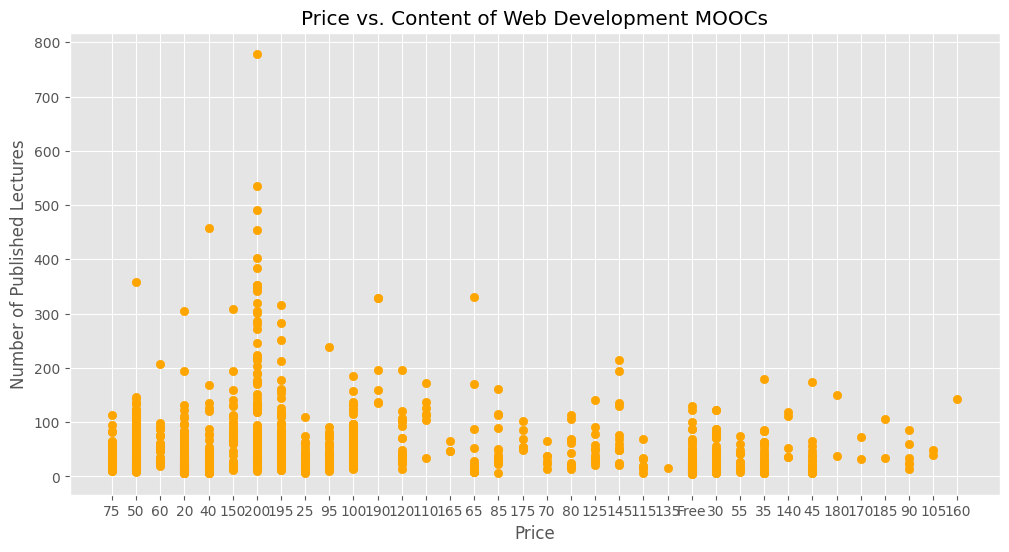

In [67]:
plt.figure(figsize=(12,6))
plt.scatter(x = 'Price', y = 'Num_Published_Lectures', data = web_dev, color = 'orange')
plt.title('Price vs. Content of Web Development MOOCs')
plt.xlabel('Price')
plt.ylabel('Number of Published Lectures')
plt.show()

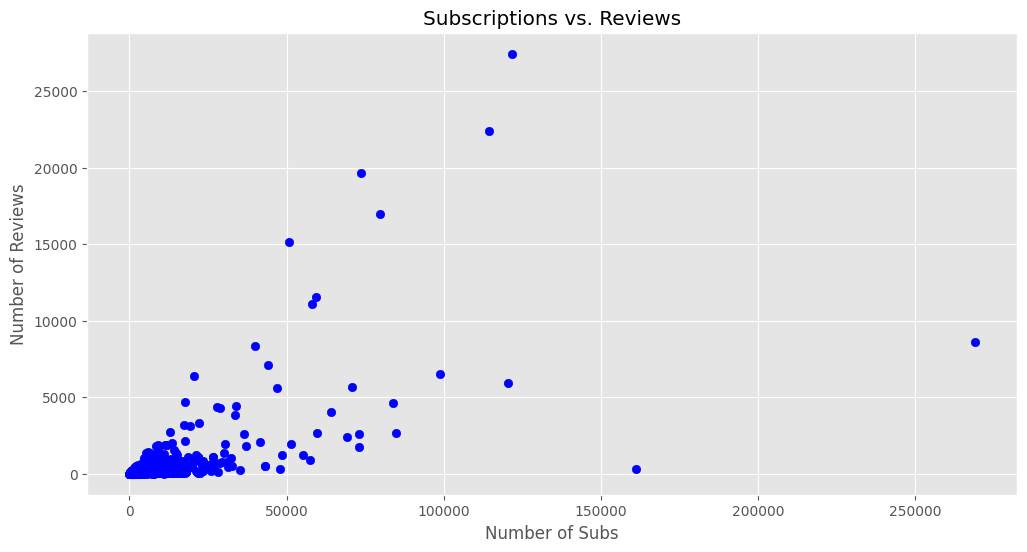

In [68]:
plt.figure(figsize=(12,6))
plt.scatter(x = 'Num_Subs', y = 'Num_Reviews', data = web_dev, color = 'blue')
plt.title('Subscriptions vs. Reviews')
plt.xlabel('Number of Subs')
plt.ylabel('Number of Reviews')
plt.show()

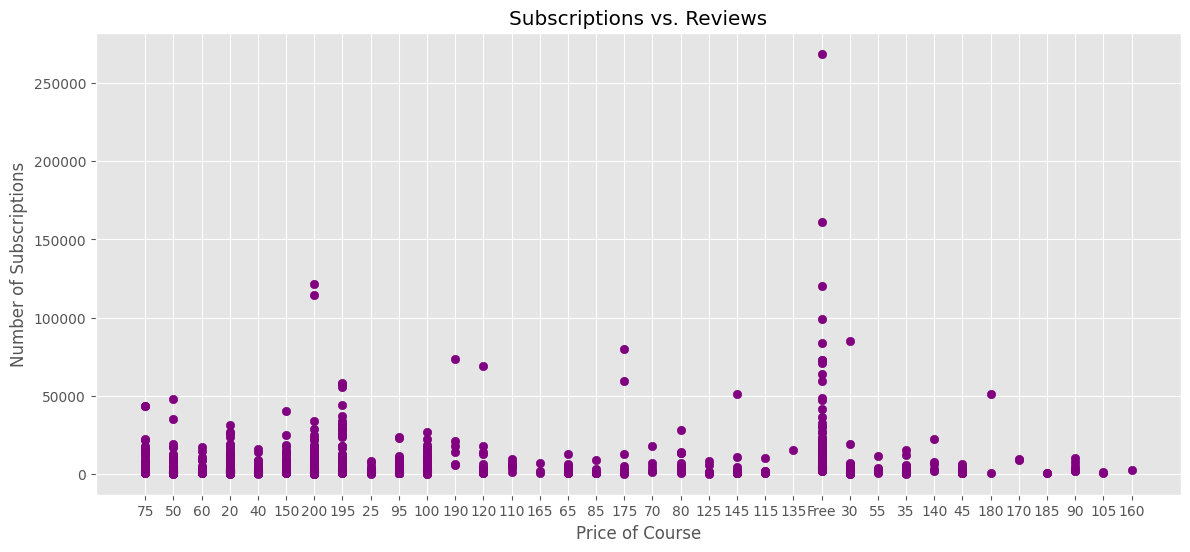

In [69]:
plt.figure(figsize=(14,6))
plt.scatter(x = 'Price', y = 'Num_Subs', data = web_dev, color = 'purple')
plt.title('Subscriptions vs. Reviews')
plt.xlabel('Price of Course')
plt.ylabel('Number of Subscriptions')
plt.show()

C:\Users\anupa\AppData\Local\Temp\ipykernel_19220\4145716421.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=30, color = 'blue')


Text(0.5, 0, 'Number of Lectures')

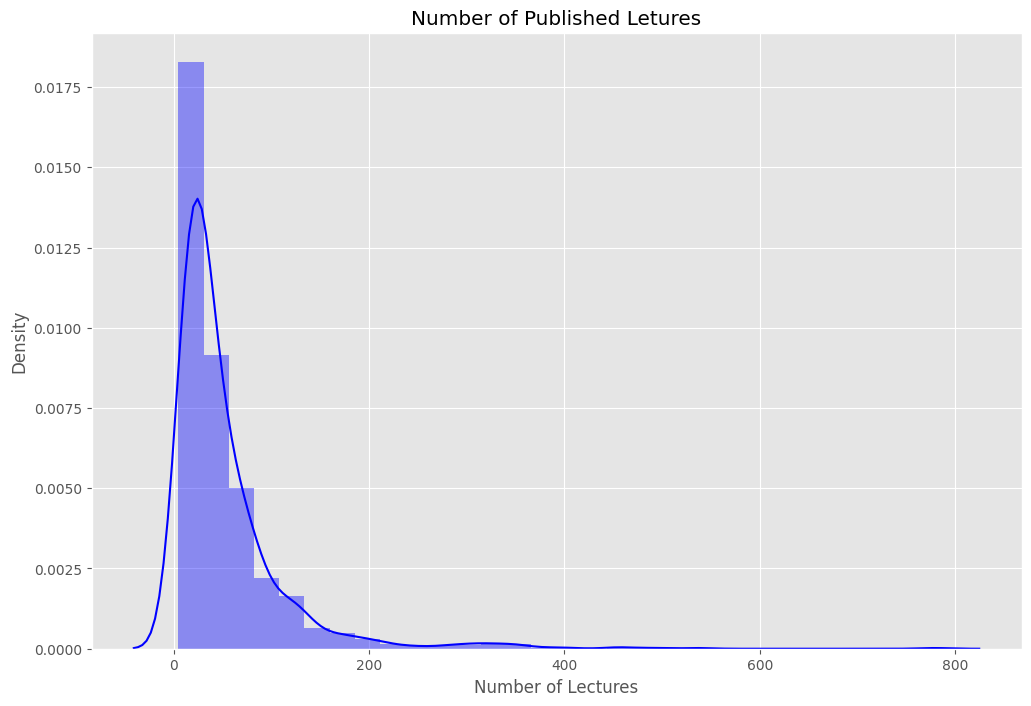

In [70]:
x = web_dev['Num_Published_Lectures']
plt.figure(figsize=(12,8))
sns.distplot(x, bins=30, color = 'blue')
plt.title('Number of Published Letures')
plt.xlabel('Number of Lectures')

In [73]:
web_dev['Is_Paid'] = web_dev['Is_Paid'].map({True: 1, False: 0})
numeric_columns_web_dev = web_dev.select_dtypes(include='number')
correlation_matrix_web_dev = numeric_columns_web_dev.corr()
correlation_matrix_web_dev

,Is_Paid,Num_Subs,Num_Reviews,Num_Published_Lectures
Is_Paid,1.000000,-0.272265,-0.072246,0.161872
Num_Subs,-0.272265,1.000000,0.643509,0.126194
Num_Reviews,-0.072246,0.643509,1.000000,0.269064
Num_Published_Lectures,0.161872,0.126194,0.269064,1.000000


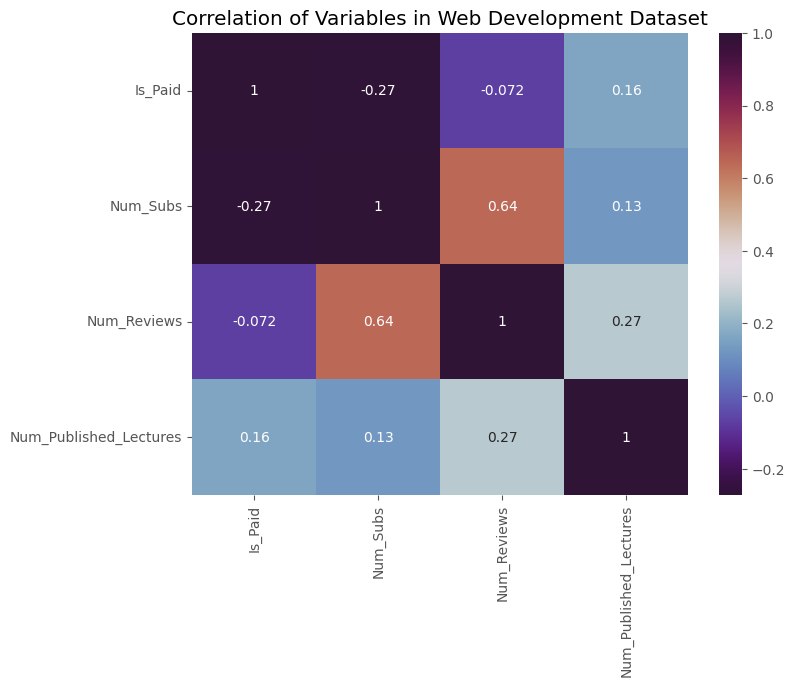

In [75]:
plt.figure(figsize=(8,6))
plt.title('Correlation of Variables in Web Development Dataset')
sns.heatmap(correlation_matrix_web_dev, cmap='twilight_shifted', annot=True)
plt.show()

In [76]:
web_dev.nunique()

Course_Title              1196
Is_Paid                      2
Price                       36
Num_Subs                  1112
Num_Reviews                409
Num_Published_Lectures     188
Instructional_Level          4
Content_Info                83
Published_Time            1199
dtype: int64

In [77]:
mooc_2016.head(3)

,Institution,Course_Number,Launch_Date,Title,Instructors,Subject,Year,Honor_Code_Certificates,Participants,N_Completed_50_Percent_Audit,...,Course_Content_Accessed,Played_Video,Posted_In_Forum,Grade_Higher_Than_Zero,Total_Course_Hours,Hours_Certification,Age,Male,Female,Bachelors_Or_Higher
0,MITx,6.002x,2012-09-05,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,2012-09-26,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,2012-10-09,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


In [78]:
mooc_2016.dtypes

Institution                             object
Course_Number                           object
Launch_Date                     datetime64[ns]
Title                                   object
Instructors                             object
Subject                                 object
Year                                     int64
Honor_Code_Certificates                  int64
Participants                             int64
N_Completed_50_Percent_Audit             int64
Certificate                              int64
Percentage_Audited                     float64
Percentage_Certified                   float64
Course_Content_Accessed                float64
Played_Video                            object
Posted_In_Forum                        float64
Grade_Higher_Than_Zero                 float64
Total_Course_Hours                     float64
Hours_Certification                    float64
Age                                    float64
Male                                   float64
Female       

In [79]:
mooc_2017.head(3)

,Institute,Course_ID,Course_Year,Semester,ID,Viewed,Explored,Certified,Country,Ed_Level,...,Grade,Start_Date,Last_Activity_Date,N_Events,N_Active_Days,N_Played_Video,N_Chapters,N_Forum_Posts,Flagged_Incomplete,Age
0,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,Bachelor's,...,0.0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
1,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,Secondary,...,0.0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
2,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,Bachelor's,...,0.0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24


In [80]:
mooc_2016.head(3)

,Institution,Course_Number,Launch_Date,Title,Instructors,Subject,Year,Honor_Code_Certificates,Participants,N_Completed_50_Percent_Audit,...,Course_Content_Accessed,Played_Video,Posted_In_Forum,Grade_Higher_Than_Zero,Total_Course_Hours,Hours_Certification,Age,Male,Female,Bachelors_Or_Higher
0,MITx,6.002x,2012-09-05,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,2012-09-26,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,2012-10-09,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


In [81]:
web_dev.nunique()

Course_Title              1196
Is_Paid                      2
Price                       36
Num_Subs                  1112
Num_Reviews                409
Num_Published_Lectures     188
Instructional_Level          4
Content_Info                83
Published_Time            1199
dtype: int64

In [82]:
mooc_2016.nunique()

Institution                       2
Course_Number                   188
Launch_Date                     204
Title                           201
Instructors                     140
Subject                           4
Year                              4
Honor_Code_Certificates           2
Participants                    288
N_Completed_50_Percent_Audit    278
Certificate                     249
Percentage_Audited              276
Percentage_Certified            262
Course_Content_Accessed         280
Played_Video                    281
Posted_In_Forum                 249
Grade_Higher_Than_Zero          281
Total_Course_Hours              285
Hours_Certification             279
Age                              22
Male                            285
Female                          285
Bachelors_Or_Higher             277
dtype: int64

In [83]:
mooc_2017.nunique()

Institute                  2
Course_ID                 13
Course_Year                2
Semester                   3
ID                    318323
Viewed                     2
Explored                   2
Certified                  2
Country                   34
Ed_Level                   5
Gender                     3
Grade                    101
Start_Date               411
Last_Activity_Date       404
N_Events                9480
N_Active_Days            152
N_Played_Video          2492
N_Chapters                48
N_Forum_Posts              7
Flagged_Incomplete         2
Age                       76
dtype: int64

In [84]:
edx_courses.nunique()

EDX_Title             972
Summary               887
N_enrolled            849
Course_Type             2
Institution           111
EDX_Instructors       775
Level                   3
EDX_Subject            31
Language                9
Subtitles              33
Course_Effort          53
Course_Length          18
EDX_Price              47
Course_Description    932
Course_Syllabus       411
Course_URL            974
dtype: int64

### Since there were no identical column names, I elected to concatenate the data frames instead of performing an inner or outer join. 

In [85]:
mooc_all = pd.concat([edx_courses, mooc_2016, mooc_2017, web_dev]).fillna(0)

In [86]:
mooc_all.head(3)

,EDX_Title,Summary,N_enrolled,Course_Type,Institution,EDX_Instructors,Level,EDX_Subject,Language,Subtitles,...,Flagged_Incomplete,Course_Title,Is_Paid,Price,Num_Subs,Num_Reviews,Num_Published_Lectures,Instructional_Level,Content_Info,Published_Time
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0


In [88]:
numeric_columns_mooc_all = mooc_all.select_dtypes(include='number')
correlation_matrix_mooc_all = numeric_columns_mooc_all.corr()

Text(0.5, 1.0, 'Correlation Plot of All Variables in Data Sets')

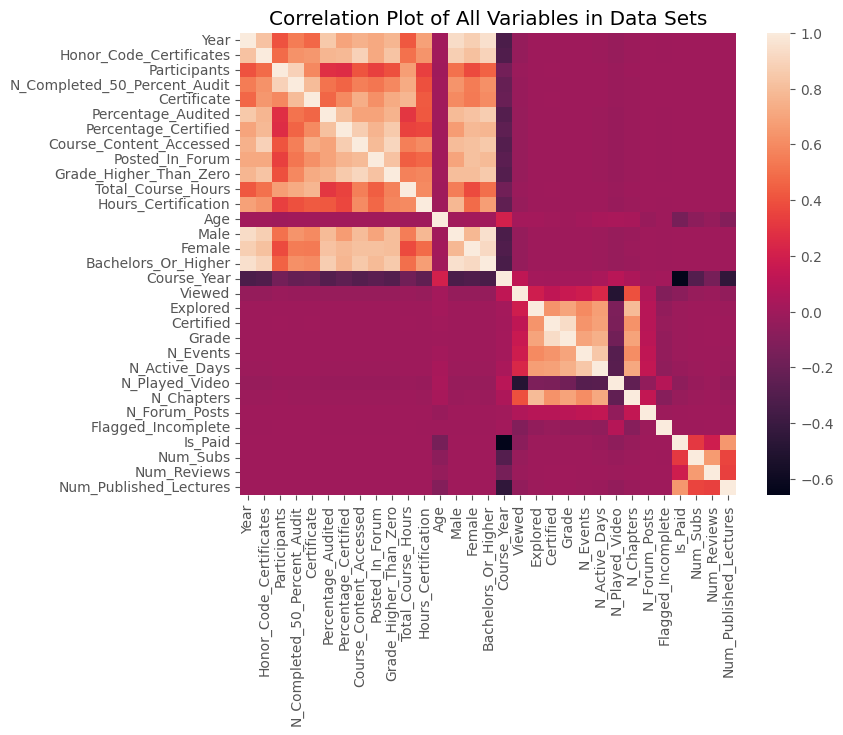

In [90]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_mooc_all, annot=False)
plt.title('Correlation Plot of All Variables in Data Sets')

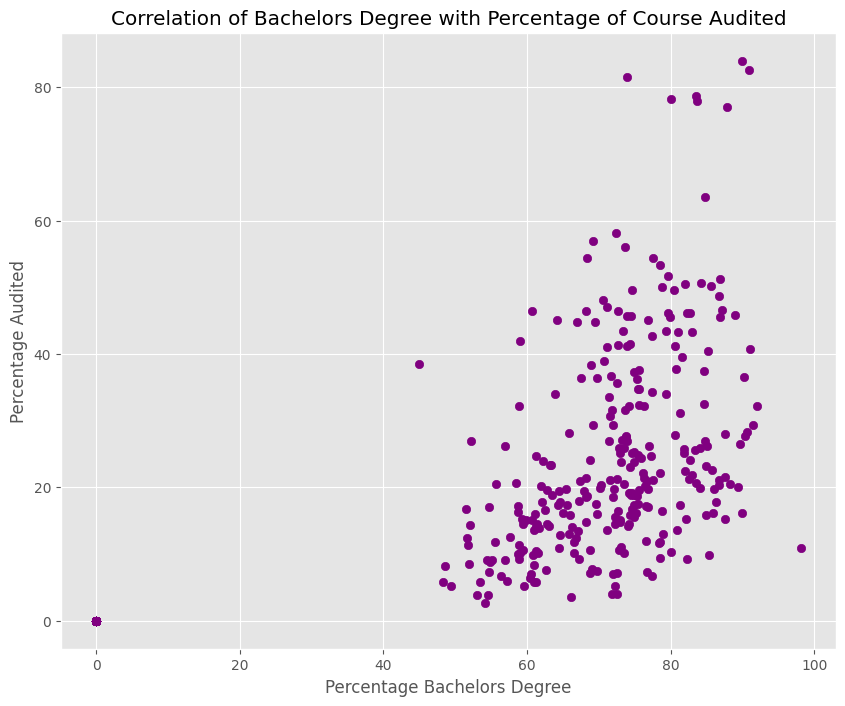

In [91]:
plt.figure(figsize=(10,8))
plt.scatter(x='Bachelors_Or_Higher', y = 'Percentage_Audited', data = mooc_all, color = 'purple')
plt.title('Correlation of Bachelors Degree with Percentage of Course Audited')
plt.xlabel('Percentage Bachelors Degree')
plt.ylabel('Percentage Audited')
plt.show()

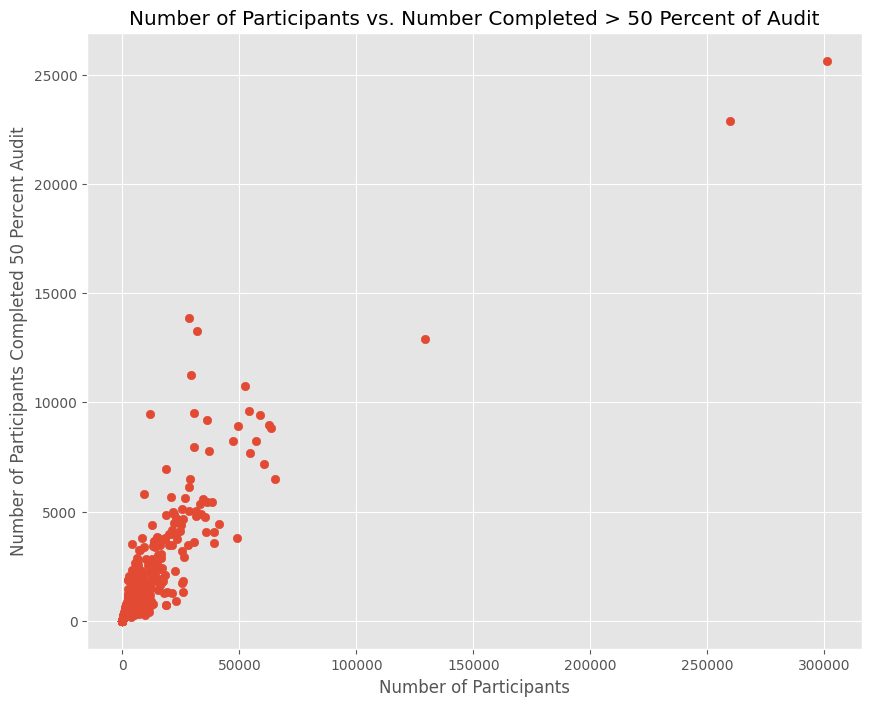

In [92]:
plt.figure(figsize=(10,8))
plt.scatter(x='Participants', y='N_Completed_50_Percent_Audit', data=mooc_all)
plt.title('Number of Participants vs. Number Completed > 50 Percent of Audit')
plt.xlabel('Number of Participants')
plt.ylabel('Number of Participants Completed 50 Percent Audit')
plt.show()

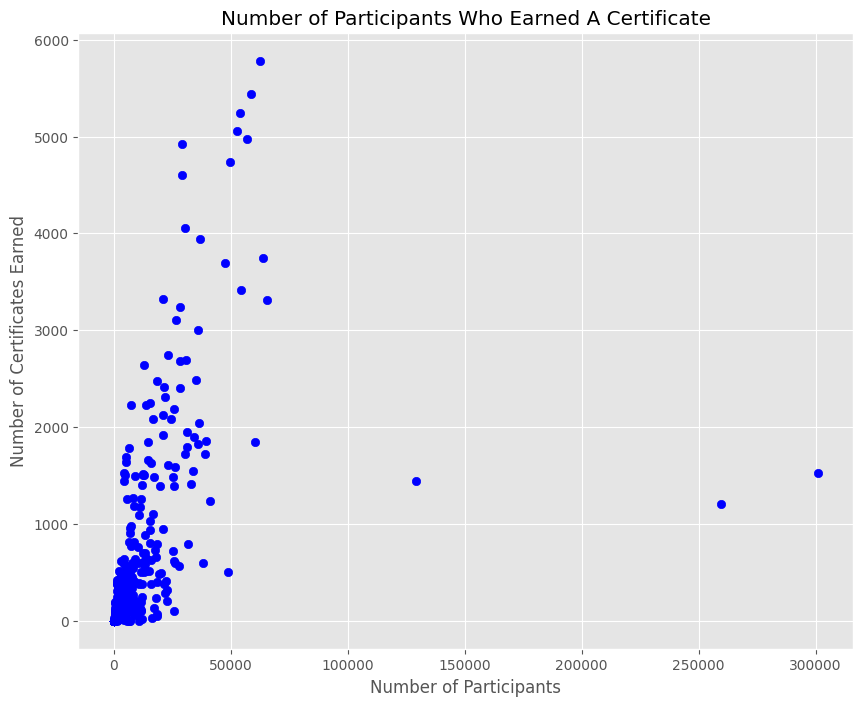

In [93]:
plt.figure(figsize=(10,8))
plt.scatter(x='Participants', y='Certificate',data=mooc_all, color='blue')
plt.title('Number of Participants Who Earned A Certificate')
plt.xlabel('Number of Participants')
plt.ylabel('Number of Certificates Earned')
plt.show()

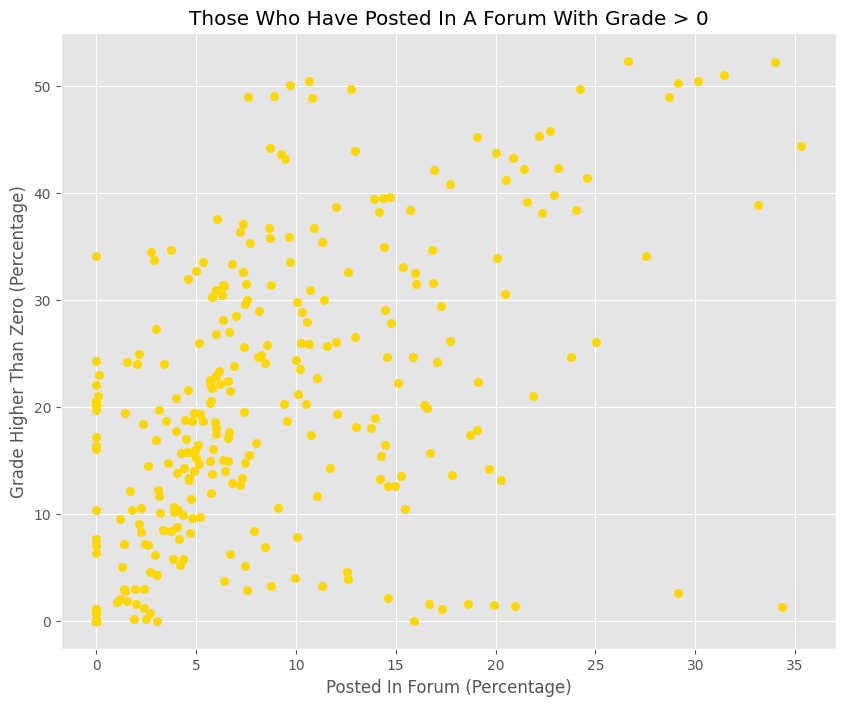

In [94]:
plt.figure(figsize=(10,8))
plt.scatter(x='Posted_In_Forum', y='Grade_Higher_Than_Zero', data=mooc_all, color='gold')
plt.title('Those Who Have Posted In A Forum With Grade > 0')
plt.xlabel('Posted In Forum (Percentage)')
plt.ylabel('Grade Higher Than Zero (Percentage)')
plt.show()

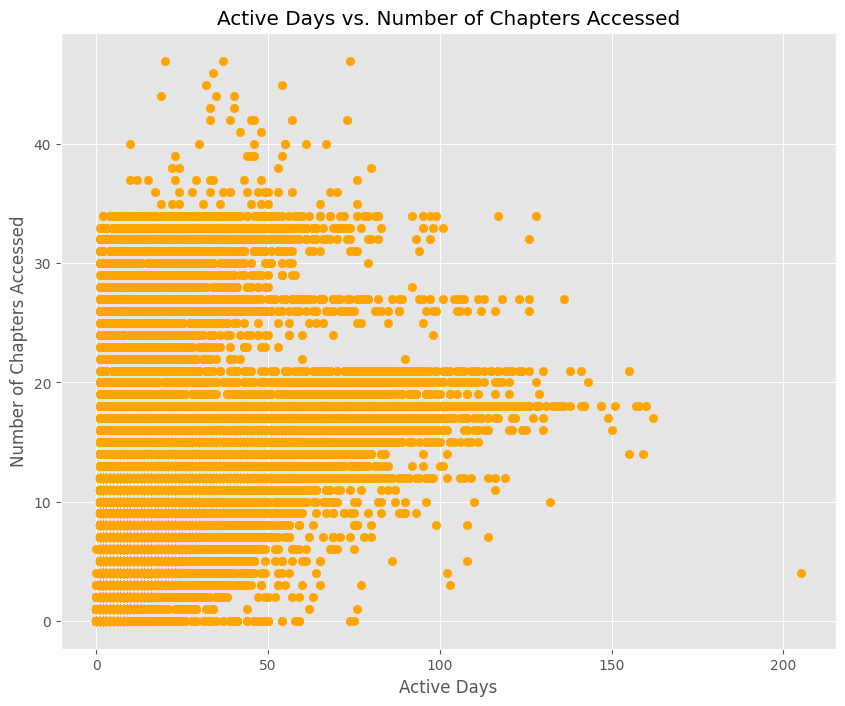

In [95]:
plt.figure(figsize=(10,8))
plt.scatter(x='N_Active_Days', y='N_Chapters', data=mooc_all, color='orange')
plt.title('Active Days vs. Number of Chapters Accessed')
plt.xlabel('Active Days')
plt.ylabel('Number of Chapters Accessed')
plt.show()

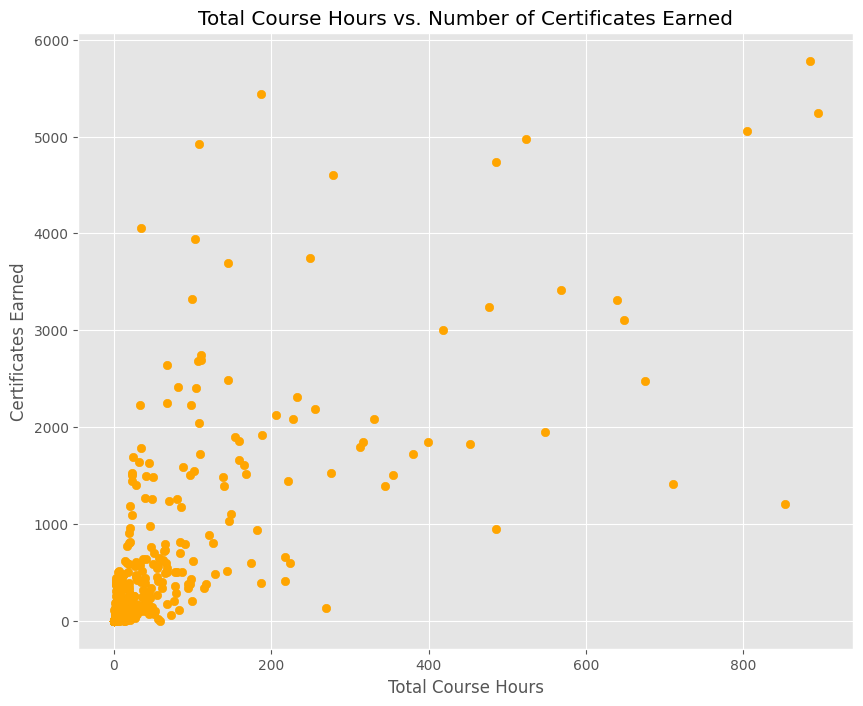

In [96]:
plt.figure(figsize=(10,8))
plt.scatter(x='Total_Course_Hours', y='Certificate', data=mooc_all, color='orange')
plt.title('Total Course Hours vs. Number of Certificates Earned')
plt.xlabel('Total Course Hours')
plt.ylabel('Certificates Earned')
plt.show()

In [97]:
mooc_all.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 396174 entries, 0 to 1199
Data columns (total 67 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   EDX_Title                     396174 non-null  object 
 1   Summary                       396174 non-null  object 
 2   N_enrolled                    396174 non-null  object 
 3   Course_Type                   396174 non-null  object 
 4   Institution                   396174 non-null  object 
 5   EDX_Instructors               396174 non-null  object 
 6   Level                         396174 non-null  object 
 7   EDX_Subject                   396174 non-null  object 
 8   Language                      396174 non-null  object 
 9   Subtitles                     396174 non-null  object 
 10  Course_Effort                 396174 non-null  object 
 11  Course_Length                 396174 non-null  object 
 12  EDX_Price                     396174 non-null  obje

### Since logistic regression can only work with numeric variables, I created a subset with these data types.

In [98]:
mooc_all_num = mooc_all[['Participants', 'Bachelors_Or_Higher', 'Posted_In_Forum', 'Grade_Higher_Than_Zero', 'Price', 'Num_Subs', 'Num_Reviews', 'Num_Published_Lectures', 'Is_Paid', 'N_Events', 'N_Active_Days', 'N_Chapters', 'N_Forum_Posts', 'Flagged_Incomplete', 'Grade', 'Viewed', 'Explored', 'Certified', 'Course_Year', 'Male', 'Female', 'Age', 'Hours_Certification', 'Total_Course_Hours', 'Played_Video', 'Course_Content_Accessed', 'Percentage_Certified', 'Percentage_Audited', 'N_Completed_50_Percent_Audit', 'Honor_Code_Certificates', 'Year']]

In [104]:
numeric_columns_mooc_all_num = mooc_all_num.select_dtypes(include='number')
correlation_matrix_mooc_all_num = numeric_columns_mooc_all_num.corr()
correlation_matrix_mooc_all_num

,Participants,Bachelors_Or_Higher,Posted_In_Forum,Grade_Higher_Than_Zero,Num_Subs,Num_Reviews,Num_Published_Lectures,Is_Paid,N_Events,N_Active_Days,...,Female,Age,Hours_Certification,Total_Course_Hours,Course_Content_Accessed,Percentage_Certified,Percentage_Audited,N_Completed_50_Percent_Audit,Honor_Code_Certificates,Year
Participants,1.000000,0.450541,0.344334,0.393424,-0.000299,-0.000160,-0.000464,-0.000680,-0.003644,-0.006312,...,0.378013,0.002238,0.339242,0.670562,0.409487,0.264364,0.278887,0.884740,0.486988,0.399948
Bachelors_Or_Higher,0.450541,1.000000,0.791657,0.853544,-0.000610,-0.000327,-0.000948,-0.001390,-0.007445,-0.012897,...,0.920839,0.008344,0.670055,0.496992,0.846732,0.771333,0.868640,0.619325,0.891700,0.954679
Posted_In_Forum,0.344334,0.791657,1.000000,0.822611,-0.000481,-0.000258,-0.000748,-0.001097,-0.005872,-0.010173,...,0.818265,0.008703,0.475231,0.439356,0.790361,0.764673,0.692429,0.522674,0.716346,0.715302
Grade_Higher_Than_Zero,0.393424,0.853544,0.822611,1.000000,-0.000522,-0.000280,-0.000811,-0.001189,-0.006368,-0.011032,...,0.805639,0.007370,0.583998,0.562461,0.904843,0.851306,0.754159,0.589844,0.828213,0.767377
Num_Subs,-0.000299,-0.000610,-0.000481,-0.000522,1.000000,0.662974,0.354130,0.307534,-0.006347,-0.010996,...,-0.000556,-0.068244,-0.000439,-0.000319,-0.000523,-0.000460,-0.000520,-0.000392,-0.000556,-0.000593
Num_Reviews,-0.000160,-0.000327,-0.000258,-0.000280,0.662974,1.000000,0.343462,0.185485,-0.003400,-0.005889,...,-0.000298,-0.036551,-0.000235,-0.000171,-0.000280,-0.000246,-0.000279,-0.000210,-0.000298,-0.000317
Num_Published_Lectures,-0.000464,-0.000948,-0.000748,-0.000811,0.354130,0.343462,1.000000,0.647693,-0.009865,-0.017089,...,-0.000864,-0.106062,-0.000682,-0.000496,-0.000813,-0.000715,-0.000809,-0.000609,-0.000864,-0.000921
Is_Paid,-0.000680,-0.001390,-0.001097,-0.001189,0.307534,0.185485,0.647693,1.000000,-0.014461,-0.025051,...,-0.001266,-0.155473,-0.001000,-0.000727,-0.001191,-0.001048,-0.001186,-0.000893,-0.001266,-0.001350
N_Events,-0.003644,-0.007445,-0.005872,-0.006368,-0.006347,-0.003400,-0.009865,-0.014461,1.000000,0.843528,...,-0.006779,0.015826,-0.005354,-0.003892,-0.006378,-0.005612,-0.006348,-0.004780,-0.006779,-0.007229
N_Active_Days,-0.006312,-0.012897,-0.010173,-0.011032,-0.010996,-0.005889,-0.017089,-0.025051,0.843528,1.000000,...,-0.011744,0.033965,-0.009275,-0.006743,-0.011049,-0.009722,-0.010998,-0.008280,-0.011744,-0.012524


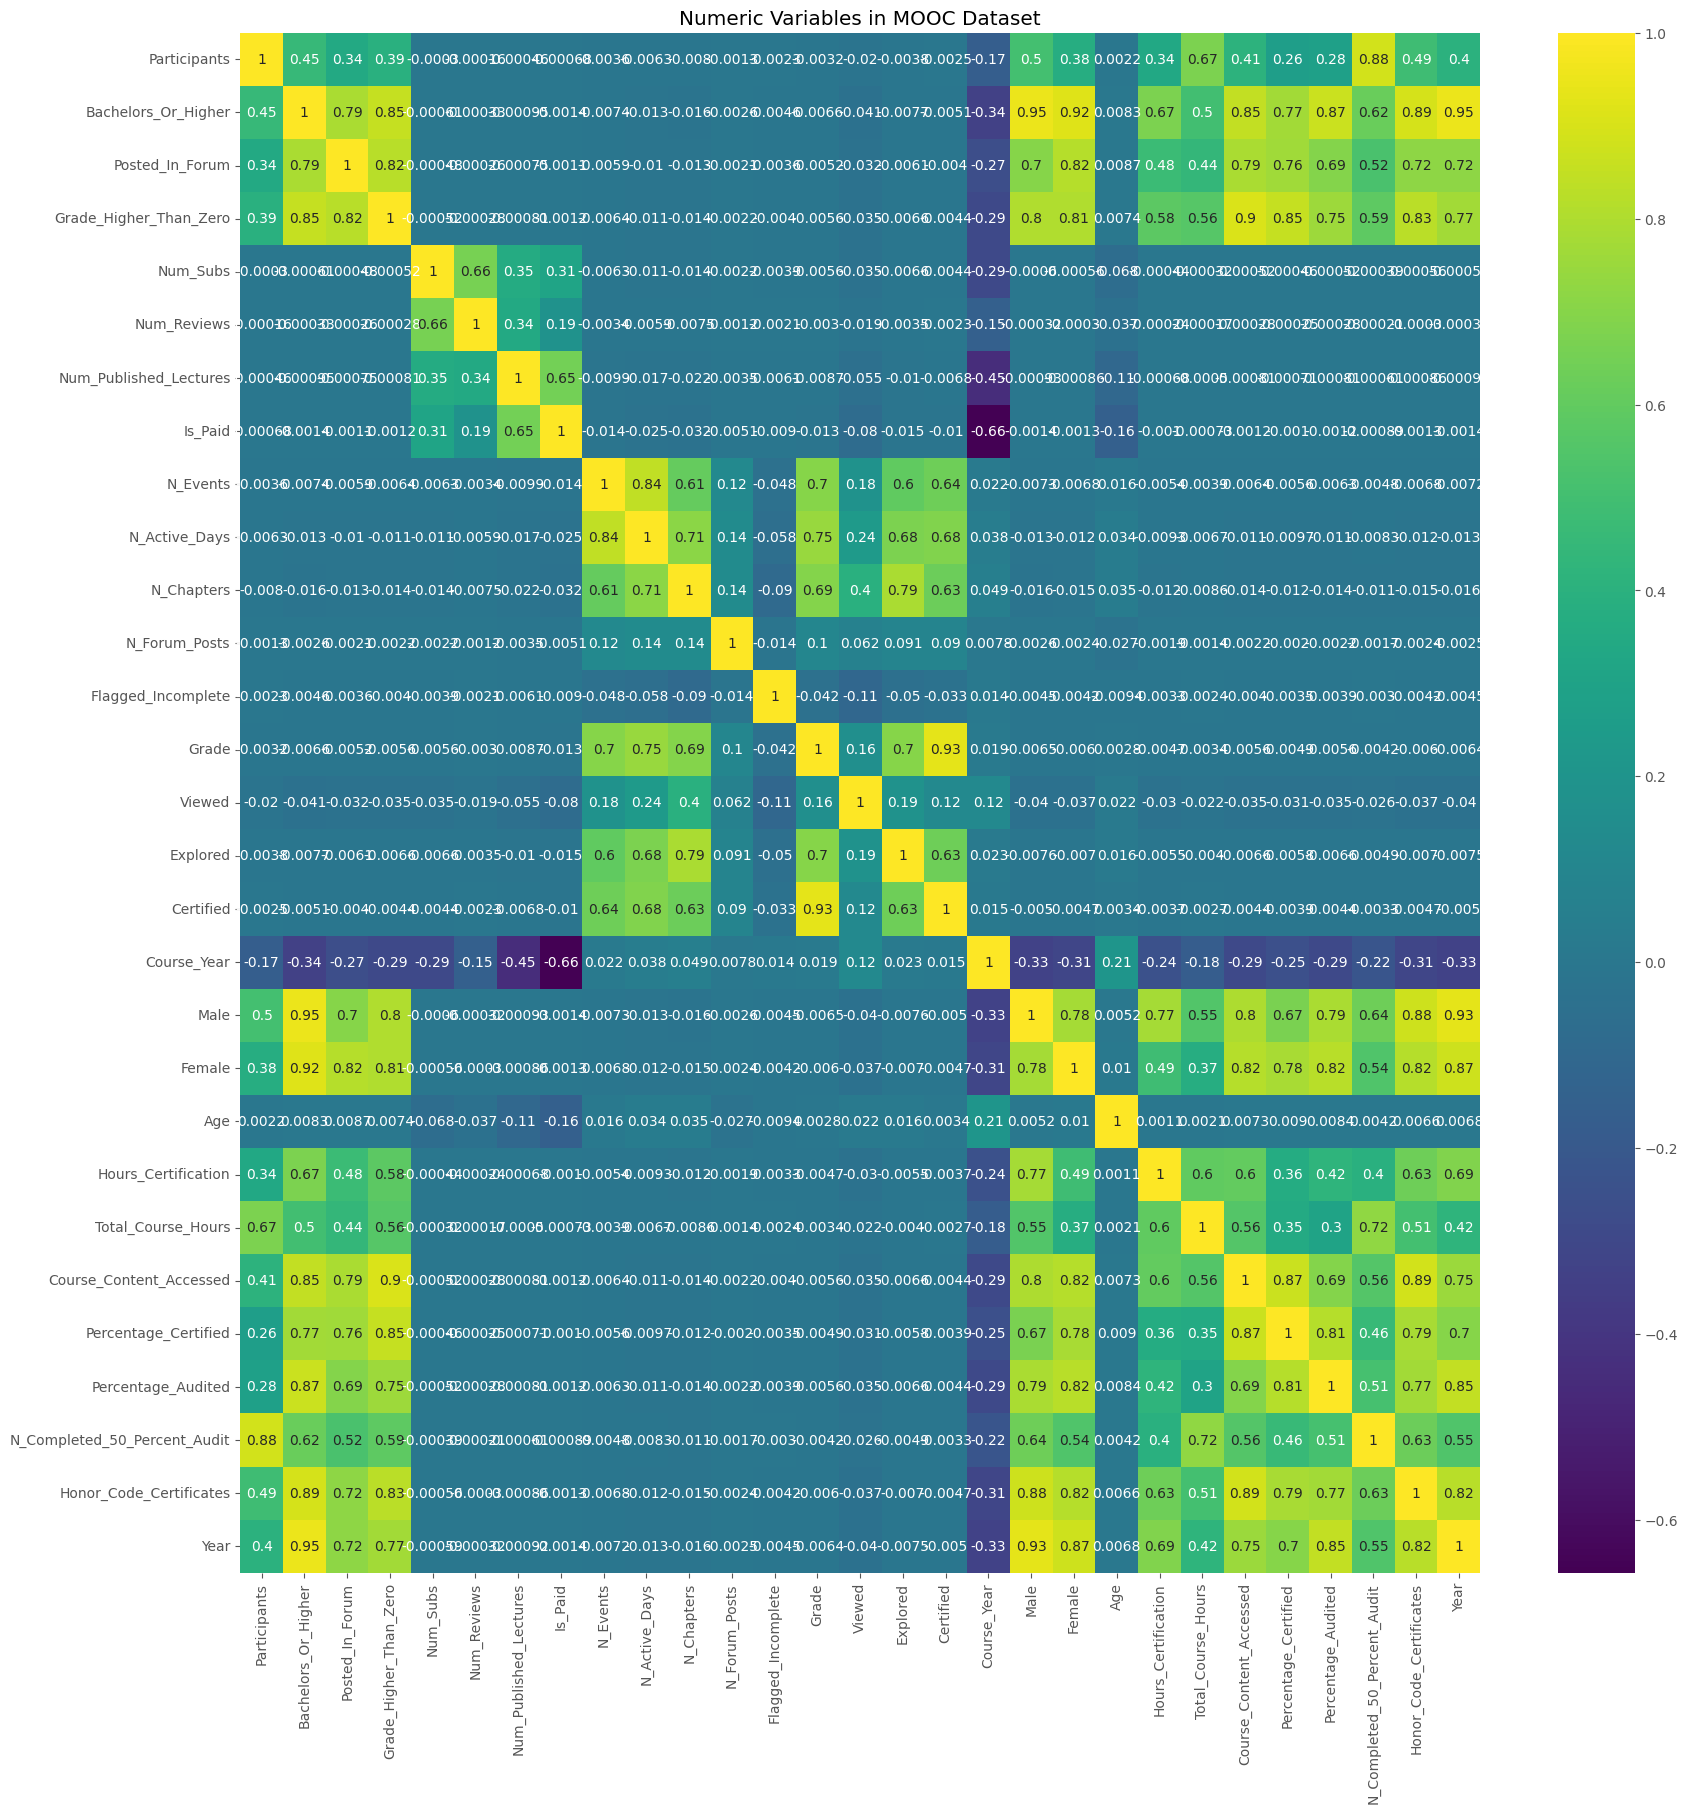

In [105]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix_mooc_all_num, annot=True, cmap='viridis')
plt.title('Numeric Variables in MOOC Dataset')
plt.show()

In [106]:
mooc_all_num_2 = mooc_all_num[['Male', 'Female', 'Hours_Certification', 'Total_Course_Hours', 'Course_Content_Accessed', 'Honor_Code_Certificates', 'Percentage_Audited', 'Percentage_Certified', 'Posted_In_Forum', 'Bachelors_Or_Higher', 'Num_Subs', 'Num_Reviews', 'Grade_Higher_Than_Zero', 'Participants', 'N_Completed_50_Percent_Audit', 'N_Chapters', 'N_Events']]

In [107]:
mooc_all_num_2.dtypes

Male                            float64
Female                          float64
Hours_Certification             float64
Total_Course_Hours              float64
Course_Content_Accessed         float64
Honor_Code_Certificates         float64
Percentage_Audited              float64
Percentage_Certified            float64
Posted_In_Forum                 float64
Bachelors_Or_Higher             float64
Num_Subs                        float64
Num_Reviews                     float64
Grade_Higher_Than_Zero          float64
Participants                    float64
N_Completed_50_Percent_Audit    float64
N_Chapters                      float64
N_Events                        float64
dtype: object

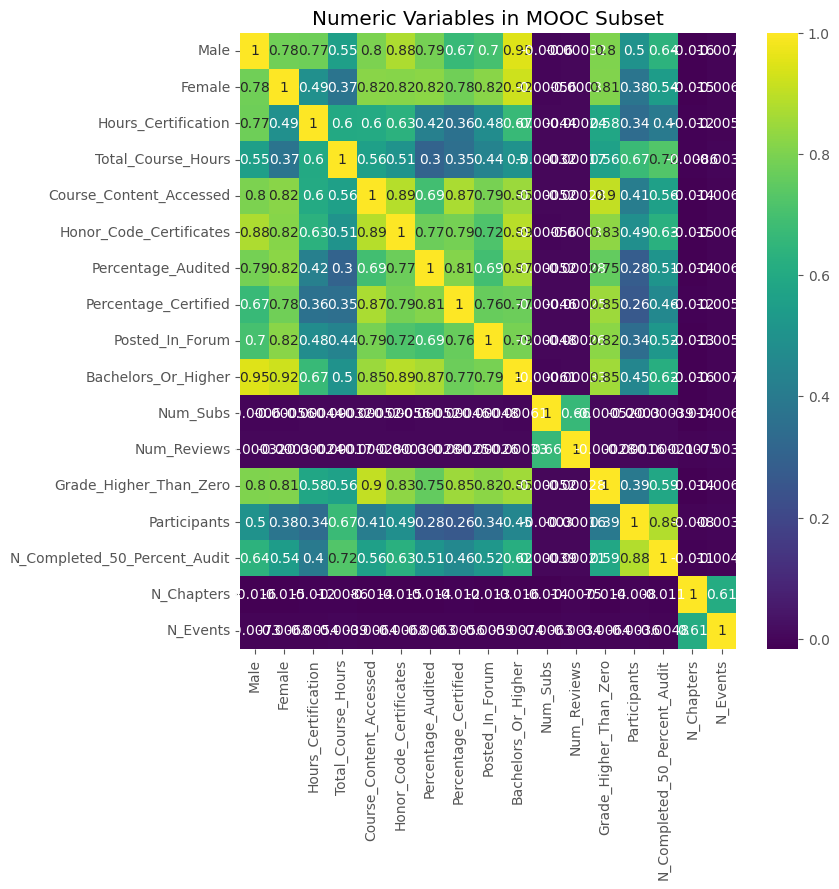

In [109]:
plt.figure(figsize=(8,8))
mooc_all_num_2.corr()
sns.heatmap(mooc_all_num_2.corr(), annot=True, cmap='viridis')
plt.title('Numeric Variables in MOOC Subset')
plt.show()

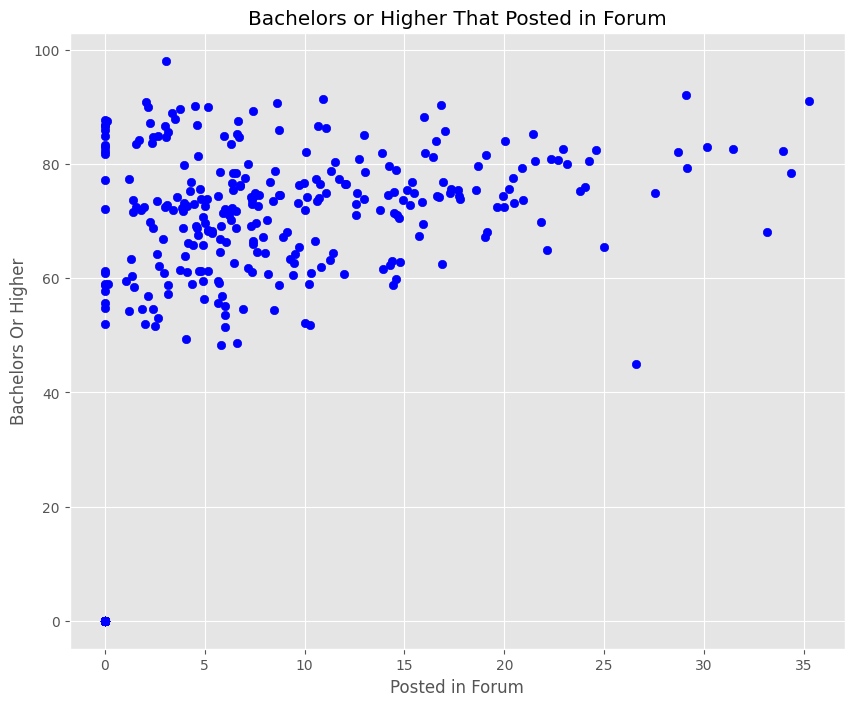

In [110]:
plt.figure(figsize=(10,8))
plt.scatter(x = 'Posted_In_Forum', y = 'Bachelors_Or_Higher', data= mooc_all_num, color='blue')
plt.title('Bachelors or Higher That Posted in Forum')
plt.xlabel('Posted in Forum')
plt.ylabel('Bachelors Or Higher')
plt.show()

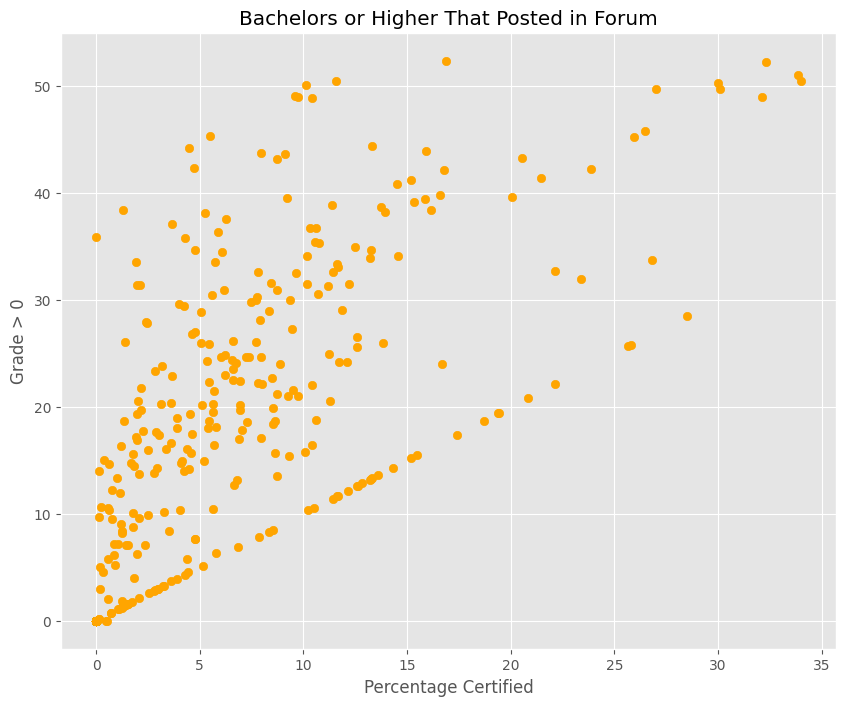

In [111]:
plt.figure(figsize=(10,8))
plt.scatter(x = 'Percentage_Certified', y = 'Grade_Higher_Than_Zero', data= mooc_all_num, color='orange')
plt.title('Bachelors or Higher That Posted in Forum')
plt.xlabel('Percentage Certified')
plt.ylabel('Grade > 0')
plt.show()

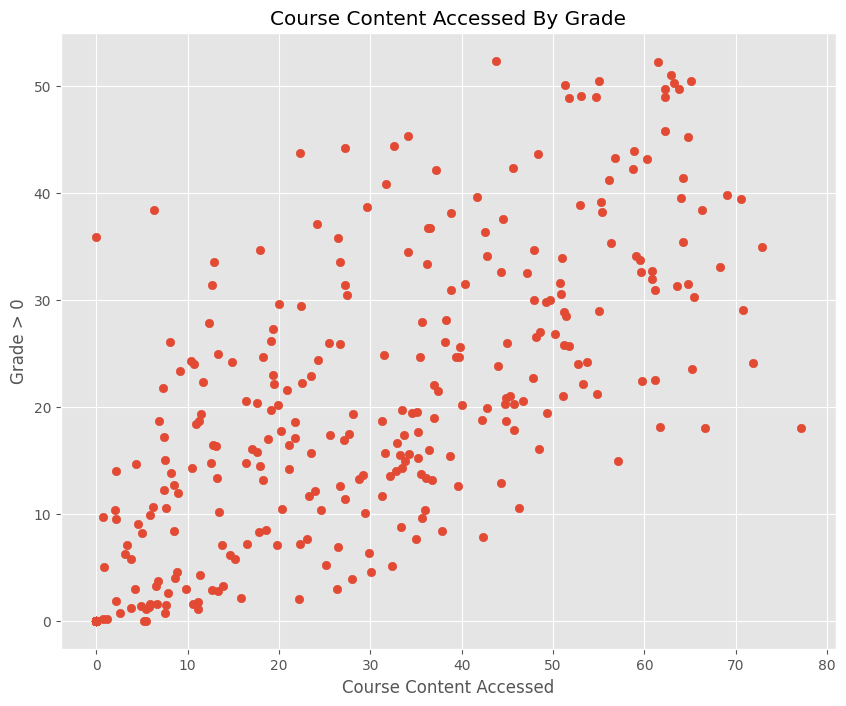

In [112]:
plt.figure(figsize=(10,8))
plt.scatter(x = 'Course_Content_Accessed', y = 'Grade_Higher_Than_Zero', data= mooc_all_num)
plt.title('Course Content Accessed By Grade')
plt.xlabel('Course Content Accessed')
plt.ylabel('Grade > 0')
plt.show()

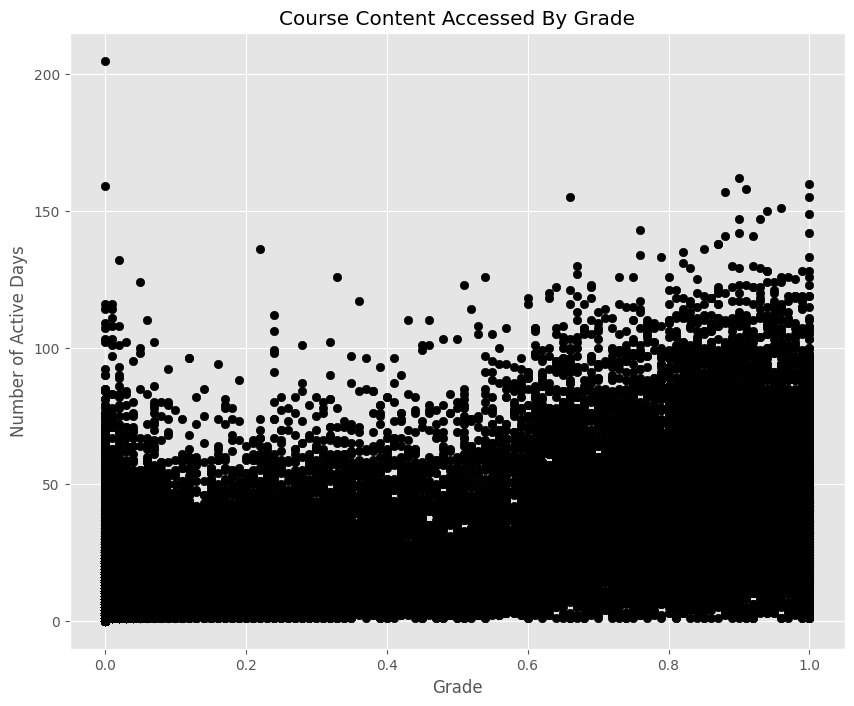

In [113]:
plt.figure(figsize=(10,8))
plt.scatter(x = 'Grade', y = 'N_Active_Days', data= mooc_all_num, color='black')
plt.title('Course Content Accessed By Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Active Days')
plt.show()

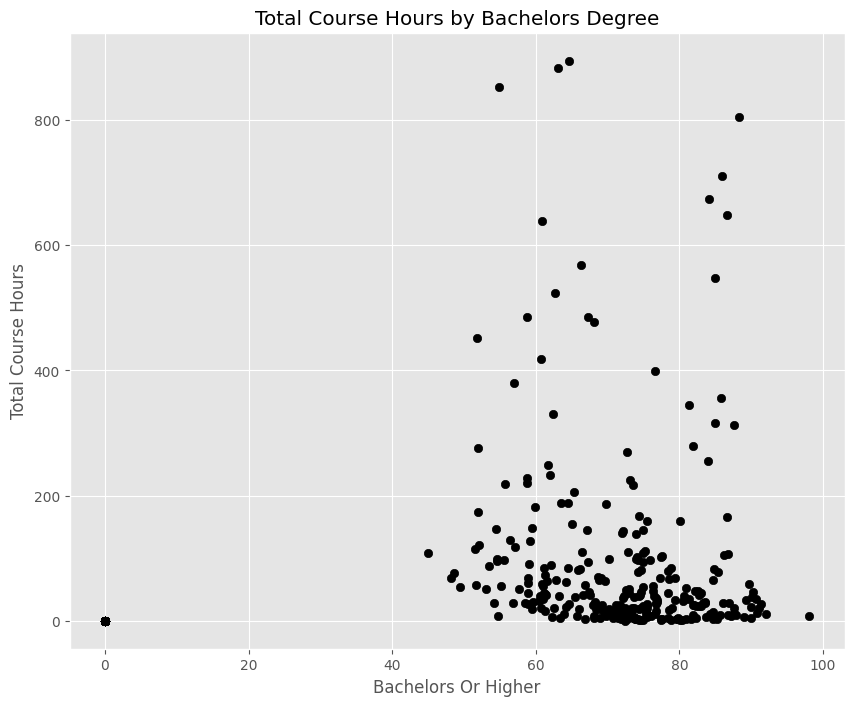

In [114]:
plt.figure(figsize=(10,8))
plt.scatter(x = 'Bachelors_Or_Higher', y = 'Total_Course_Hours', data= mooc_all_num, color='black')
plt.title('Total Course Hours by Bachelors Degree')
plt.xlabel('Bachelors Or Higher')
plt.ylabel('Total Course Hours')
plt.show()

# Section 2: Model 1 - Comprehensive Model

### The first model combines demographic, behavioral and content features to predict the likelihood of a student completing a course.

In [116]:
multinomial_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [117]:
y = mooc_all_num[['Certified']]
X = mooc_all_num[['Hours_Certification', 'Total_Course_Hours', 'Course_Content_Accessed', 'Percentage_Audited', 'Percentage_Certified', 'Posted_In_Forum', 'Bachelors_Or_Higher', 'Num_Subs', 'Num_Reviews', 'Grade_Higher_Than_Zero', 'Participants', 'N_Completed_50_Percent_Audit', 'N_Chapters', 'N_Events']]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [119]:
multinomial_reg.fit(X_train, y_train)

c:\Users\anupa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [120]:
y_pred = multinomial_reg.predict(X_test)

In [121]:
from sklearn import metrics

In [122]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [123]:
cnf_matrix

array([[94764,   693],
       [ 1496,  2091]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

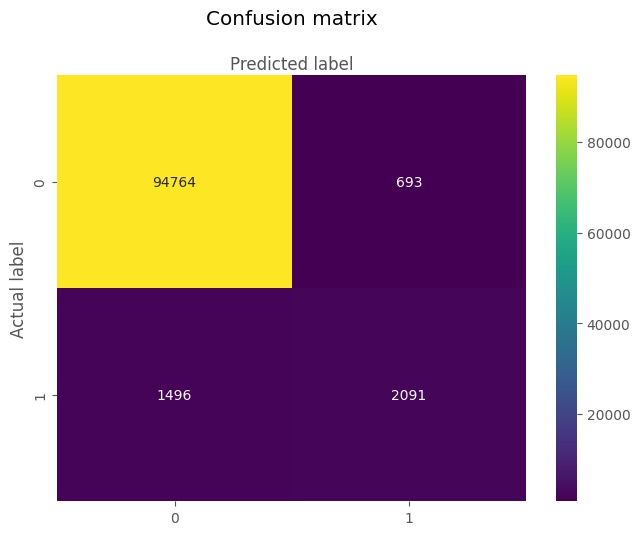

In [124]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='viridis', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [125]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9778987116836961
Precision: 0.7510775862068966
Recall: 0.5829383886255924


In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     95457
         1.0       0.75      0.58      0.66      3587

    accuracy                           0.98     99044
   macro avg       0.87      0.79      0.82     99044
weighted avg       0.98      0.98      0.98     99044



# Section 3: Model 2 - Behavioral Model

### The second model combines information related to behavior such as the course content accessed and frequency of posting in a discussion forum to predict whether or not a student will pay for an honor code certificate.

In [127]:
y_2 = mooc_all_num[['Honor_Code_Certificates']]
X_2 = mooc_all_num[['Hours_Certification', 'Course_Content_Accessed', 'Percentage_Audited', 'Posted_In_Forum', 'Bachelors_Or_Higher', 'Grade_Higher_Than_Zero']]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.25, random_state=0)

In [129]:
multinomial_reg.fit(X_train, y_train)

c:\Users\anupa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [130]:
y_pred = multinomial_reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [131]:
cnf_matrix

array([[98986,     3],
       [    4,    51]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

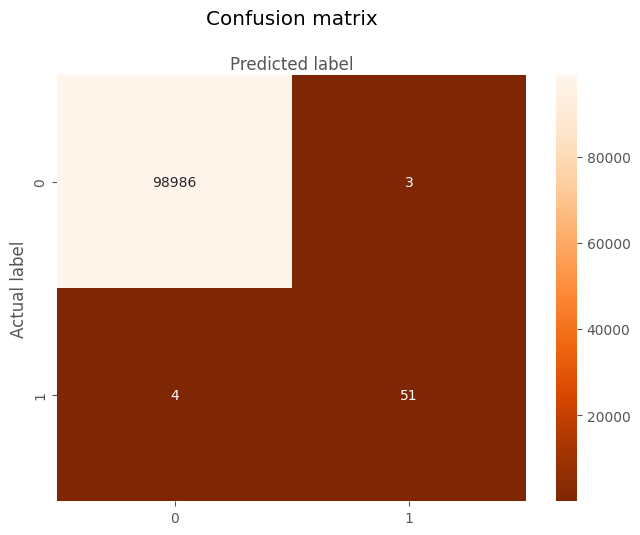

In [132]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Oranges_r', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [133]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))

Accuracy: 0.999929324340697
Precision 0.9444444444444444
Recall 0.9272727272727272


In [134]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     98990
         1.0       0.93      0.94      0.94        54

    accuracy                           1.00     99044
   macro avg       0.96      0.97      0.97     99044
weighted avg       1.00      1.00      1.00     99044



# Section 4: Model 3 - Content-Based Model

### The final model assessed the impact of content attributes such as the number of chapters or number of reviews on a student's decision to view module content.

In [135]:
y_3 = mooc_all_num[['Viewed']]
X_3 = mooc_all_num[['N_Chapters', 'N_Events', 'Num_Reviews', 'Num_Subs']]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.25, random_state=0)

In [137]:
multinomial_reg.fit(X_train, y_train)

c:\Users\anupa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [138]:
y_pred = multinomial_reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

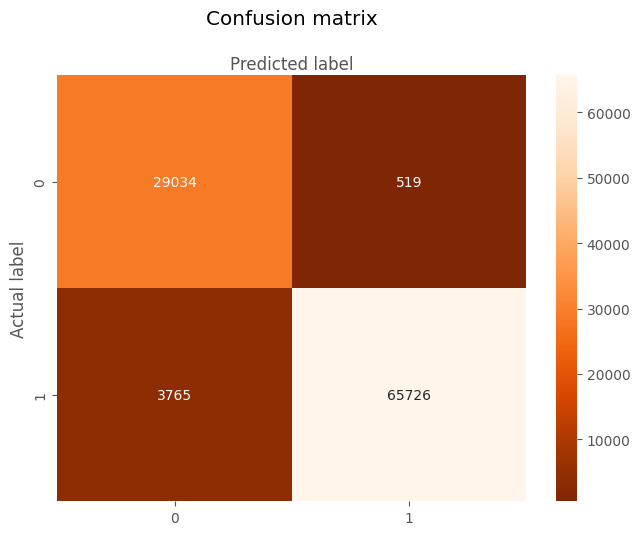

In [139]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Oranges_r', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [140]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9567464965066032
Precision: 0.9921654464487886
Recall: 0.9458203220560936


In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93     29553
         1.0       0.99      0.95      0.97     69491

    accuracy                           0.96     99044
   macro avg       0.94      0.96      0.95     99044
weighted avg       0.96      0.96      0.96     99044



# Results

#### For a 75-25 split the multivariable models were very precise, with an accuracy that ranged between 95 and 99 percent. The first model was the weakest out of the three. While its accuracy rate was 97 percent, the model’s precision and recall statistics were considerably lower, at 75 and 60 percent respectively. While a 97 percent accuracy sounds ideal, it is difficult to say, with absolute certainty, that this model is that accurate because the precision and recall rates mean that it did not reliably discern between true positives, true negatives, false positives and false negatives over 75 percent of the time. 

#### The next model reduced the number of independent variables by more than half to six. This time, the model combined hours of certification, course content accessed, percentage audited, the history of a student posting in a discussion forum, the number of students with a bachelor’s degree or higher and a grade higher than zero to predict whether they would earn an honor code certificate and, ultimately, pay for such a distinction (as opposed to conducting a free audit). The reduction of variables resulted in a far more reliable model with an accuracy rate of 96 percent, a precision of 99 percent, and a recall of 95 percent.

#### The final model combined the least amount of variables, ingesting only four columns: number of chapters, number of events, number of reviews and number of subscriptions to predict how many students would view at least one module. Like the previous model, this combination of a few highly positively correlated variables yielded a high accuracy rate of 95 percent, but more importantly, a precision rate of 99 percent, and a recall rate of 95 percent. However, this model could better discern between actual and predicted labels than the previous two iterations. 